# MASTERS RESEARCH

# CONTENT PAGE
## 1. IMPORT PACKAGES
## 2. IMPORT DATA
    ### Dates
    ### Temperature Data - ACORN-SAT 1910-2021
    ### Temperature Data - Perth Gardens 1880 - 1900
    ### Temperature Data - PERTH SURVEY OFFICE/COLONIAL HOTEL
    ### DATASET FROM 1880-2021 with 1900-1910 Missing
    ### Set Daily_Extremes to Datetime DO NOT DO
## 3. Initial Review of Datasets and Temperature Observations
    ### Comparison of 1880-1900 datasets
    ### ACORN-SAT 1910-2021
    ### Plot The Full Temperature so 1880-2021
        #### What is the yearly average in the daily extremes
        #### What is the % of days above 40C in the current and the 1880s-1900 record
    ### Looking at the 1830-1875 Sub-daily Dataset
        #### Notes from PT2-The_Concatenation_Of_1835_1875DATA.py
    ### Other Key Notes From PT1-Initial_Review_Of_Datasets.py
    ### The Distrubitions of November to March Temperatures over the hostorical period
## 4. The Heatwave Definition
    ### Notes from PT3_The_PreAnalsysis_1880_2020_heatwave_Def.py
    ### End of 2021
    ### Back to Beginning of 2021 what I said 
    ### Excess Heat Factor
    ### Using Different CDP baselines
    ### Contining On with CDP Baselines PT6_PERCENTILE_BASED_ANALYSIS_IMPROVED.PY
    ### Choosing the right Percentile with the heatwave function and the right baseline
        #### Baseline - PT_16_PLOTS_FOR_CONFERENCE
        #### COMPARISON WMO AND BOM BASELINES WITH DIFFERENT PERCENTILES
## 5. 19TH CENTURY HEATWAVES
## 6. ANALYSING HEATWAVE TRENDS
## 7. UNDERSTANDING HEATWAVE CLIMATE AND WEATHER PATTERNS

## 1. IMPORT PACKAGES

In [1]:
import sys
sys.path.append(r"C:\Users\jarra\Desktop\Masters\Heatwave_Project")
import pandas as pd
import PT13_Functions_For_Masters_New_Test as HW_Func
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

## 2. IMPORT DATA

### Dates 
This is used in the concatination process when using the Calendar Day Percentile and other things 
that have the datetime data disappear. Since the full 366 days need to be accounted for, 2020 was 
the year I chose for this.

In [2]:
Dates = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\Dates, includes feb 29.csv")

### Temperature Data - ACORN-SAT 1910-2021
We have the max, min and daily extreme average.
We also dropped the first row as it doesnt have any information in it and this is then concatenated together 

This data is only for 1910-2021, adding the 1880-1900 will come later

In [3]:
#Max Temp, (drop(0) has dropped the 0th index, so it starts at 1)
MaxT_Perth = pd.read_csv(r"C:\Users\jarra\Desktop\UPDATED TMAX, TMIN ACORN-SAT\tmax.009021.daily (3).csv").drop(0)
#Min Temp
MinT_Perth = pd.read_csv(r"C:\Users\jarra\Desktop\UPDATED TMAX, TMIN ACORN-SAT\tmin.009021.daily (2).csv").drop(0)
#Ave Temp
AvgT_Perth = (MaxT_Perth['maximum temperature (degC)']+MinT_Perth['minimum temperature (degC)'])/2

Maximum = pd.Series(MaxT_Perth['maximum temperature (degC)'], name="Max")
Minimum = pd.Series(MinT_Perth['minimum temperature (degC)'],name="Min")
Average = pd.Series(AvgT_Perth,name="Avg")

#The Daily Max Min Ave Data
Daily_Extremes = pd.concat([MaxT_Perth['date'],Maximum,Minimum,Average],axis=1)

#Check that it has worked
print(Daily_Extremes.head())
Daily_Extremes.tail()


         date   Max   Min    Avg
1  1910-01-01  26.7  16.4  21.55
2  1910-01-02  27.0  13.5  20.25
3  1910-01-03  27.5  12.0  19.75
4  1910-01-04  24.0  13.5  18.75
5  1910-01-05  24.8   9.8  17.30


date   Max   Min    Avg
40904  2021-12-27  40.6  26.3  33.45
40905  2021-12-28  41.5  23.9  32.70
40906  2021-12-29  39.5  18.4  28.95
40907  2021-12-30  34.2  17.7  25.95
40908  2021-12-31  33.7  18.6  26.15

### Temperature Data - Perth Gardens 1880-1900

Perth Survey Office -1884 Perth Gardens -1896 Perth Regional Office 1896 1880-1900
This is the Perth Gardens Temperature Dataset, there is a corrected version and a raw version.

In [4]:
P_Gardens = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\perthgardens_daily_1880-1900.csv")
P_Gardens_Corr = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\perthgardens_daily_corrected_1880-1900.csv")

print(P_Gardens_Corr.head())
P_Gardens_Corr.tail()

#Now we need to go back in time and minus 200 years off the date
#Convert To Datetime

P_Gardens['time'] = pd.to_datetime(P_Gardens['time'],format="%d/%m/%Y")
#print(P_Gardens)
P_Gardens_Corr['time'] = pd.to_datetime(P_Gardens_Corr['time'],format="%d/%m/%Y")
#print(P_Gardens_Corr)
#P_Gardens_Corr

#Split the Year up

P_Gardens = HW_Func.Date_Splitter(P_Gardens,'time',single= True)
P_Gardens_Corr = HW_Func.Date_Splitter(P_Gardens_Corr,'time',single= True)
P_Gardens['year'] = P_Gardens['year']-200
P_Gardens_Corr['year'] = P_Gardens_Corr['year']-200
#Combine in same format as ACORN-SAT

cols=["year","month","day"]
P_Gardens['date'] = P_Gardens[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
P_Gardens_Corr['date'] = P_Gardens_Corr[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
P_Gardens
del P_Gardens['time']
del P_Gardens_Corr['time']
del P_Gardens['year']
del P_Gardens_Corr['year']
del P_Gardens['month']
del P_Gardens_Corr['month']
del P_Gardens['day']
del P_Gardens_Corr['day']

#Cannot save cause it breaks the datetime on Excel

         time       tmax       tmin
0  01/01/2080  38.494444  26.093889
1  02/01/2080  40.383333  23.760556
2  03/01/2080  40.438889  21.427222
3  04/01/2080  40.716667  22.038333
4  05/01/2080  39.050000  19.048269


### Temperature Data - PERTH SURVEY OFFICE/COLONIAL HOTEL
PERTH SURVEY OFFICE/COLONIAL HOTEL 1830 - 1875
This is the sub-daily observations with other interesting aspects in the Swan River location and Regional Office, several times it moved, but I will have to note the locations. It is homogenised as much as possible.

In [5]:
Swan_River_Sub_Daily_Obs = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\swanriver_subdaily_1830-1875.csv")
Swan_River_Sub_Daily_Obs

Unnamed: 0  800  830     900    1000  1100    1200  1300  1400    1500  \
0      1830-04-16  NaN  NaN     NaN     NaN   NaN  23.056   NaN   NaN  25.833   
1      1830-04-17  NaN  NaN     NaN  22.222   NaN     NaN   NaN   NaN  26.389   
2      1830-04-18  NaN  NaN     NaN  23.333   NaN     NaN   NaN   NaN     NaN   
3      1830-04-19  NaN  NaN  20.417     NaN   NaN     NaN   NaN   NaN     NaN   
4      1830-04-20  NaN  NaN  15.833     NaN   NaN  24.167   NaN   NaN     NaN   
...           ...  ...  ...     ...     ...   ...     ...   ...   ...     ...   
16691  1875-12-27  NaN  NaN     NaN     NaN   NaN     NaN   NaN   NaN     NaN   
16692  1875-12-28  NaN  NaN     NaN     NaN   NaN     NaN   NaN   NaN     NaN   
16693  1875-12-29  NaN  NaN     NaN  24.444   NaN     NaN   NaN   NaN     NaN   
16694  1875-12-30  NaN  NaN     NaN  25.556   NaN     NaN   NaN   NaN     NaN   
16695  1875-12-31  NaN  NaN     NaN  25.000   NaN     NaN   NaN   NaN     NaN   

       ...  1230  1410  interval  0900_transcribed  1000_transcribed  \
0      ...   NaN   NaN       NaN               NaN               NaN   
1      ...   NaN   NaN       NaN               NaN               NaN   
2      ...   NaN   NaN       NaN               NaN               NaN   
3      ...   NaN   NaN       NaN               NaN               NaN   
4      ...   NaN   NaN       NaN               NaN               NaN   
...    ...   ...   ...       ...               ...               ...   
16691  ...   NaN   NaN       NaN               NaN               NaN   
16692  ...   NaN   NaN       NaN               NaN               NaN   
16693  ...   NaN   NaN       NaN               NaN               NaN   
16694  ...   NaN   NaN       NaN               NaN               NaN   
16695  ...   NaN   NaN       NaN               NaN               NaN   

       1600_transcribed  interval1_transcribed  interval2_transcribed  \
0                   NaN                    NaN                    NaN   
1                   NaN                    NaN                    NaN   
2                   NaN                    NaN                    NaN   
3                   NaN                    NaN                    NaN   
4                   NaN                    NaN                    NaN   
...                 ...                    ...                    ...   
16691               NaN                    NaN                    NaN   
16692               NaN                    NaN                    NaN   
16693               NaN                    NaN                    NaN   
16694               NaN                    NaN                    NaN   
16695               NaN                    NaN                    NaN   

       0900_hospital  1500_hospital  
0                NaN            NaN  
1                NaN            NaN  
2                NaN            NaN  
3                NaN            NaN  
4                NaN            NaN  
...              ...            ...  
16691            NaN            NaN  
16692            NaN            NaN  
16693            NaN            NaN  
16694            NaN            NaN  
16695            NaN            NaN  

[16696 rows x 60 columns]

Locations of Each of the Observations

ACORN-SAT - PERTH AIRPORT - 31.93S 115.98E

PERTH GARDENS - 31.95S, 115.85E http://www.bom.gov.au/jsp/ncc/cdio/cvg/av

PERTH REGIONAL OFFICE - 31.96S, 115.87E

Not sure where the Perth Survey Office and the Colonial Hotel are in Perth for the old datasets. These are in the vacinitiy of the Perth Gardens it is 2.0km from the Perth Regional Office, which is known and has sub-daily data and max and min data too for comparison
http://www.bom.gov.au/climate/averages/tables/cw_009097_Info.shtml
from this website, the BOM we willhave to get in touch with them and probably pay a fee to figure out the information needed to find Perth's historical heatwaves which is a setback in a sense and I am particularly annoyed but it is what it is

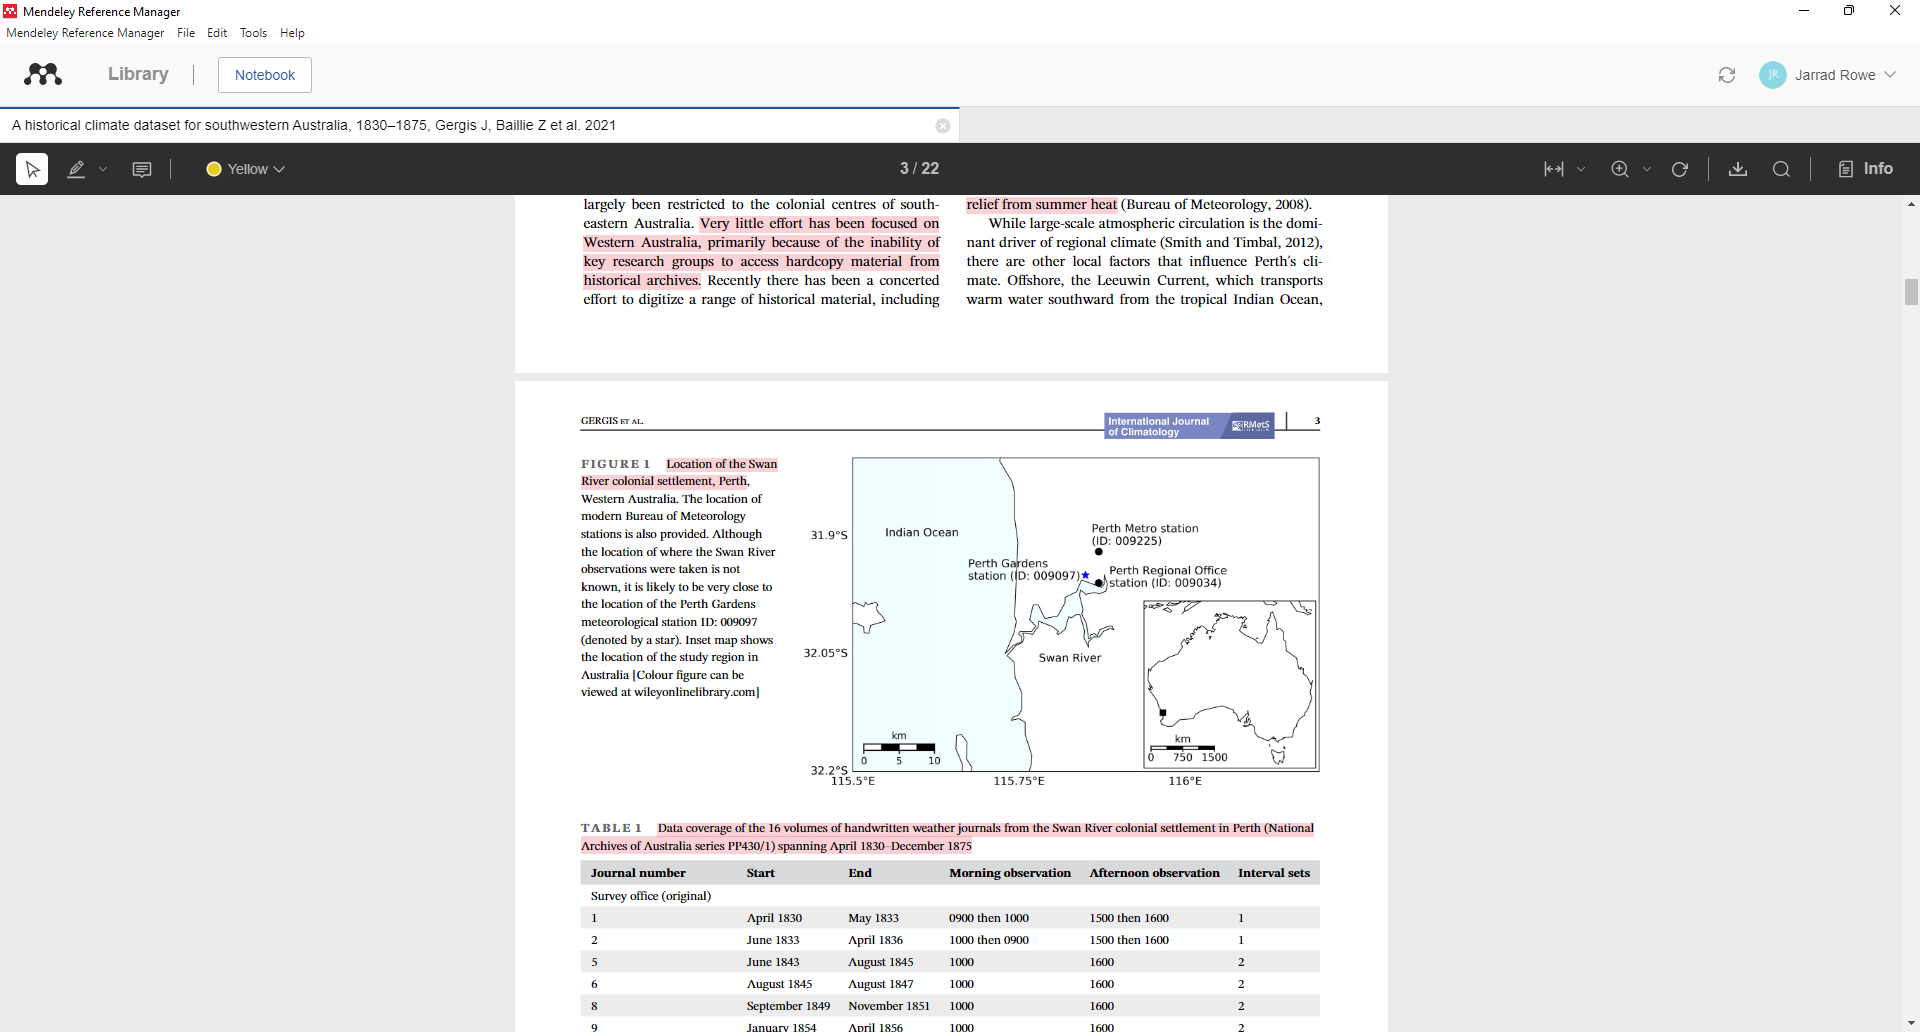



### DATASET FROM 1880-2021 with 1900-1910 Missing

In [6]:
Daily_Extremes_1880_2021 = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\Perth_Max_Min_1880_2021.csv")
cols = ['Year','Month','Day']
Daily_Extremes_1880_2021['date'] = Daily_Extremes_1880_2021[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
Daily_Extremes_1880_2021
del Daily_Extremes_1880_2021['Year']
del Daily_Extremes_1880_2021['Month']
del Daily_Extremes_1880_2021['Day']
Daily_Extremes_1880_2021

#Ave Temp
AvgT_Perth_1880_2021 = (Daily_Extremes_1880_2021['Max']+Daily_Extremes_1880_2021['Min'])/2

Average_1880_2021 = pd.Series(AvgT_Perth_1880_2021,name="Avg")

#The Daily Max Min Ave Data
Daily_Extremes_1880_2021 = pd.concat([Daily_Extremes_1880_2021,Average_1880_2021],axis=1)
Daily_Extremes_1880_2021

Max        Min        date        Avg
0      39.444444  25.777778    1880-1-1  32.611111
1      41.333333  23.444444    1880-1-2  32.388889
2      41.388889  21.111111    1880-1-3  31.250000
3      41.666667  21.722222    1880-1-4  31.694444
4      40.000000  18.888889    1880-1-5  29.444444
...          ...        ...         ...        ...
51860  40.600000  26.300000  2021-12-27  33.450000
51861  41.500000  23.900000  2021-12-28  32.700000
51862  39.500000  18.400000  2021-12-29  28.950000
51863  34.200000  17.700000  2021-12-30  25.950000
51864  33.700000  18.600000  2021-12-31  26.150000

[51865 rows x 4 columns]

In [7]:
## Perth Regional Office Daily Extreme Dataset
#Load PRO in
#BOM PERTH REGIONAL OFFICE
MaxT_PRO = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\IDCJAC0010_009034_1800_Data.csv")
MinT_PRO = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\IDCJAC0011_009034_1800_Data.csv")

#Clean The data
MaxT_PRO['Datetime']= pd.to_datetime(MaxT_PRO[['Year', 'Month', 'Day']])
MinT_PRO['Datetime']= pd.to_datetime(MinT_PRO[['Year', 'Month', 'Day']])

#Delete irrelevent columns
del MaxT_PRO['Product code']
del MaxT_PRO['Bureau of Meteorology station number']
del MaxT_PRO['Year']
del MaxT_PRO['Month']
del MaxT_PRO['Day']
del MaxT_PRO['Days of accumulation of maximum temperature']
del MaxT_PRO['Quality']
del MinT_PRO['Product code']
del MinT_PRO['Bureau of Meteorology station number']
del MinT_PRO['Year']
del MinT_PRO['Month']
del MinT_PRO['Day']
del MinT_PRO['Days of accumulation of minimum temperature']
del MinT_PRO['Quality']

#Change the column name to date
MaxT_PRO= MaxT_PRO.rename(columns={'Datetime':'date'})
MinT_PRO= MinT_PRO.rename(columns={'Datetime':'date'})


#Change the column names
MaxT_PRO= MaxT_PRO.rename(columns={'Maximum temperature (Degree C)':'PRO Max'})
MinT_PRO= MinT_PRO.rename(columns={'Minimum temperature (Degree C)':'PRO Min'})

#Now concat it
MaxT_PRO= MaxT_PRO.set_index('date')
MinT_PRO= MinT_PRO.set_index('date')

PRO_DE = pd.merge(left = MaxT_PRO,right  =MinT_PRO,left_index=True,right_index=True  )
PRO_DE


PRO Max  PRO Min
date                        
1897-01-01     30.6     19.4
1897-01-02     29.4     17.8
1897-01-03     27.8     18.3
1897-01-04     31.7     14.4
1897-01-05     36.7     16.1
...             ...      ...
1992-04-25     29.6     15.7
1992-04-26     30.0     19.5
1992-04-27     22.4     15.7
1992-04-28     22.7     15.7
1992-04-29     24.6     16.3

[34817 rows x 2 columns]

### Set Daily_Extremes to Datetime DO NOT DO
Only daily extremes works with datetime because of how the code works originally, but this is fixed in my new version

In [18]:
Daily_Extremes['date'] = pd.to_datetime(Daily_Extremes['date'],format="%Y/%m/%d")
print(Daily_Extremes)
Daily_Extremes_1880_2021['date'] = pd.to_datetime(Daily_Extremes_1880_2021['date'],format="%Y/%m/%d")
print(Daily_Extremes_1880_2021)

            date   Max   Min    Avg
1     1910-01-01  26.7  16.4  21.55
2     1910-01-02  27.0  13.5  20.25
3     1910-01-03  27.5  12.0  19.75
4     1910-01-04  24.0  13.5  18.75
5     1910-01-05  24.8   9.8  17.30
...          ...   ...   ...    ...
40904 2021-12-27  40.6  26.3  33.45
40905 2021-12-28  41.5  23.9  32.70
40906 2021-12-29  39.5  18.4  28.95
40907 2021-12-30  34.2  17.7  25.95
40908 2021-12-31  33.7  18.6  26.15

[40908 rows x 4 columns]
             Max        Min       date        Avg
0      39.444444  25.777778 1880-01-01  32.611111
1      41.333333  23.444444 1880-01-02  32.388889
2      41.388889  21.111111 1880-01-03  31.250000
3      41.666667  21.722222 1880-01-04  31.694444
4      40.000000  18.888889 1880-01-05  29.444444
...          ...        ...        ...        ...
51860  40.600000  26.300000 2021-12-27  33.450000
51861  41.500000  23.900000 2021-12-28  32.700000
51862  39.500000  18.400000 2021-12-29  28.950000
51863  34.200000  17.700000 2021-12-30  25

## 3. Initial Review of Datasets and Temperature Observations

This was the initial review of my datasets, so the ACORN-SAT, the Perth Regional Office, the 1830-1875 Subdaily Dataset and all the other datasets I have.

### Comparison of 1880-1900 datasets

Lets see the corrected to the original observations

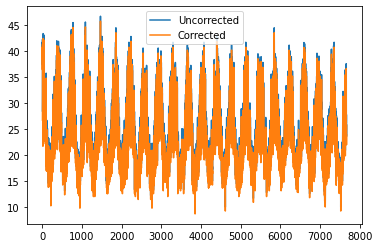

In [19]:
P_Gardens['tmax'].plot()
P_Gardens_Corr['tmax'].plot() 
plt.legend(['Uncorrected','Corrected'])


What we can see here is that the uncorrected days is hotter than the corrected days. The reasons behind the corrected due to a Glashier stand being used which is different and produces different observational errors and temperatures values compared to a Stevenson Screen that was widely used across Australia (email FW: GLAISHER STAND) but I am sure when I find the paper on my Mendeley there will be more information on there.

### ACORN-SAT 1910-2021
This is a review of the ACORN-SATv2, we know that the data for daily extremes was homogenised onto the Perth Airport, this is highly quality checked by Blair Trewin.

The movements of the temperature datasets
Perth Regional Office (9034) in the Perth Observatory until August 1963 and moved 270m NE
Airport Site opened 1944 was not used until 1966 when a homogenisation was applied to the Perth Regional Office
No comparison for the Perth Regional Office  was used after the second site move in 1967 (After 1967 we use for the Subdaily but good to know its a new site)
The airport site moved 1.5km SSE 3rd Marhc 1988 and an automatic weather station installed 20 June 1994 and primary instrument in 1 Nov 1996
The site moved 1.7km N 27 oct 1997

Perth Metro site not used in ACORN-SAT after Perth Regional Office ceased.

<AxesSubplot:>

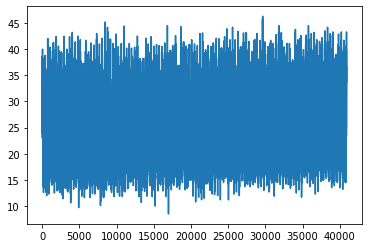

In [20]:
Daily_Extremes['Max'].plot()

<AxesSubplot:>

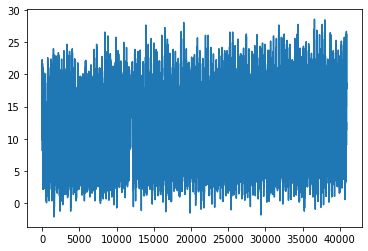

In [21]:
Daily_Extremes['Min'].plot()

<AxesSubplot:>

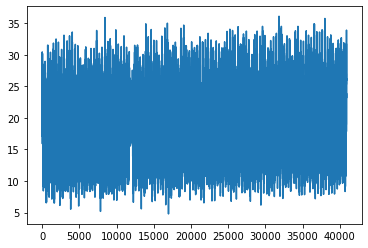

In [22]:
Daily_Extremes['Avg'].plot()

### Plot The Full Temperature so 1880-2021

<AxesSubplot:xlabel='date'>

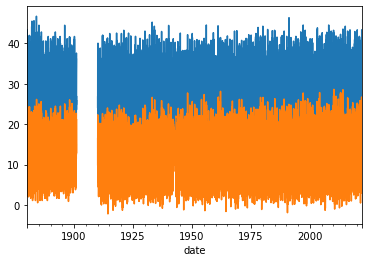

In [23]:
Daily_Extremes_1880_2021 = Daily_Extremes_1880_2021.set_index('date')

Daily_Extremes_1880_2021['Max'].plot()
Daily_Extremes_1880_2021['Min'].plot()


#### What is the yearly average in the daily extremes


<AxesSubplot:xlabel='date'>

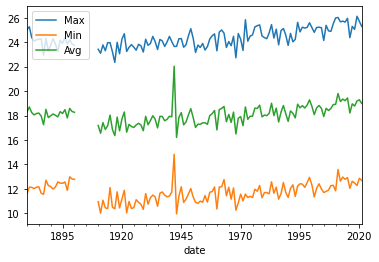

In [24]:
Daily_Extremes_1880_2021.resample('YS').mean().plot()

What we notice here is that the first 5 or 6 years are signifacantly hgiher in the 1880-1900 record compared to the rest of the in the Max column. What is interesting is that the Min continues to increase significantly throughout the 20 year period being at least 1.5-2C higher then the start of the ACORN-SAT record, therefore more research is needed. We will still use this version until we can fix the 1880-1900 record, so we will remove these dates out.

Another thing is that the Max is more in line with the ACORN-SAT maybe only 0.5C higher then the ACORN SAT

Blair must be spoken to.


Look at other extended temp records in the region and see how the late 19th century compares to the start of the 20th century

Adelaide and SE Australaia - late 19th century and early 20th century are the same

Email Blair - ABOUT ACORN-SAT and 1880-1900


Wrap the Perth Gardens into the area
Access Perth Garden: cc Andrew King
Claire Vincent
Andrew Brown - 2nd
Ben Hague - Start
Stephen Ingolina 

#### What is the % of days above 40C in the current and the 1880s-1900 record

In [25]:
Daily_Extremes_1880_1900 = Daily_Extremes_1880_2021.loc['1880-01-01':'1990-12-31']
Daily_Extremes_1910_1930 = Daily_Extremes_1880_2021.loc['1910-01-01':'1930-12-31']

In [26]:
Daily_Extremes_1880_1900_40 = 100*len(Daily_Extremes_1880_1900[Daily_Extremes_1880_1900['Max']>=40])/len(Daily_Extremes_1880_1900)

Daily_Extremes_1910_1930_40 = 100*len(Daily_Extremes_1910_1930[Daily_Extremes_1910_1930['Max']>=40])/len(Daily_Extremes_1910_1930)

print('1880-1900 % over 40 is {} and the 1910-1930 % over 40 is {}'.format(Daily_Extremes_1880_1900_40,Daily_Extremes_1910_1930_40) )

1880-1900 % over 40 is 0.7547728281781856 and the 1910-1930 % over 40 is 0.5345501955671447


We can see that there is a significant increase in the number of 40C days in the old record, therefore it is not viable to use on my heatwave definition yet as heatwaves may actually be longer then they were actually are using my definition. This is a bias error not a climate change signal.

### Looking at the 1830-1875 Sub-daily Dataset

#### Notes from PT2-The_Concatenation_Of_1835_1875DATA.py
Just from what I can see, there are 16696 rows and 60 columns which
is definitely more then 24hr time period which would be 24 columns.

Upon looking deeper there are soooo many different colomns its hard
to figure out where the data will lie
The first issue is the time, there are many different times, some just say interval 1/2/a/b/c...
And for the purposes of this I think will be removed out of the 
concatentation due to not being with a designated time stamp, as the Gergis
paper suggest that is may possibly be the "It may be that the interval temperatureobservations
 represent the maxima and minima betweenthe fixed-time observations or that they represent
 themaxima and minima of the day. " So further analysis will \be needed. Therefore since I am only
 using this dataset to anaylis what is already there. i believe it is beyond the scope
 of this paper as have Gergis have also done.
 There is another column called night which it could be just some point at night, but with no refernbce
 to the time this was taken, I will be exlcduing tjhis from the study too.
 
 there are two columns called 5pma and 5pmb which suggest that its actually 5pma == am and 5pmb == pm, but there 
 only 2 points that actually use this description, so I think we can exclude from the dataset, 
 
 I have been looking further into the 1835-1975 dataset and I need some clarification on a few of the column names.

1. 5pma and 5pmb

So my initial guess from what information they show is that 5pma is 5am and 5pmb is 5pm, as the temperature is
 10C lower for the two available dates in 5pma then 5pmb. Is this what you also believe as well?


2. noona and noob

This one is much more interesting, as there are 100 or so dates that use these columns. My first assumption 
was that, noona would be 12am and noonb would be 12pm (due to the definition of noon being at 12). But the issue 
is some dates have similar temperatures or in some cases noona temperature either will be higher or lower than the 
noonb temperature. Now I am not so certain which times these noon columns take. Is there any information you have 
that explains these column names?

In [27]:
Swan_River_Sub_Daily_Obs

Unnamed: 0  800  830     900    1000  1100    1200  1300  1400    1500  \
0      1830-04-16  NaN  NaN     NaN     NaN   NaN  23.056   NaN   NaN  25.833   
1      1830-04-17  NaN  NaN     NaN  22.222   NaN     NaN   NaN   NaN  26.389   
2      1830-04-18  NaN  NaN     NaN  23.333   NaN     NaN   NaN   NaN     NaN   
3      1830-04-19  NaN  NaN  20.417     NaN   NaN     NaN   NaN   NaN     NaN   
4      1830-04-20  NaN  NaN  15.833     NaN   NaN  24.167   NaN   NaN     NaN   
...           ...  ...  ...     ...     ...   ...     ...   ...   ...     ...   
16691  1875-12-27  NaN  NaN     NaN     NaN   NaN     NaN   NaN   NaN     NaN   
16692  1875-12-28  NaN  NaN     NaN     NaN   NaN     NaN   NaN   NaN     NaN   
16693  1875-12-29  NaN  NaN     NaN  24.444   NaN     NaN   NaN   NaN     NaN   
16694  1875-12-30  NaN  NaN     NaN  25.556   NaN     NaN   NaN   NaN     NaN   
16695  1875-12-31  NaN  NaN     NaN  25.000   NaN     NaN   NaN   NaN     NaN   

       ...  1230  1410  interval  0900_transcribed  1000_transcribed  \
0      ...   NaN   NaN       NaN               NaN               NaN   
1      ...   NaN   NaN       NaN               NaN               NaN   
2      ...   NaN   NaN       NaN               NaN               NaN   
3      ...   NaN   NaN       NaN               NaN               NaN   
4      ...   NaN   NaN       NaN               NaN               NaN   
...    ...   ...   ...       ...               ...               ...   
16691  ...   NaN   NaN       NaN               NaN               NaN   
16692  ...   NaN   NaN       NaN               NaN               NaN   
16693  ...   NaN   NaN       NaN               NaN               NaN   
16694  ...   NaN   NaN       NaN               NaN               NaN   
16695  ...   NaN   NaN       NaN               NaN               NaN   

       1600_transcribed  interval1_transcribed  interval2_transcribed  \
0                   NaN                    NaN                    NaN   
1                   NaN                    NaN                    NaN   
2                   NaN                    NaN                    NaN   
3                   NaN                    NaN                    NaN   
4                   NaN                    NaN                    NaN   
...                 ...                    ...                    ...   
16691               NaN                    NaN                    NaN   
16692               NaN                    NaN                    NaN   
16693               NaN                    NaN                    NaN   
16694               NaN                    NaN                    NaN   
16695               NaN                    NaN                    NaN   

       0900_hospital  1500_hospital  
0                NaN            NaN  
1                NaN            NaN  
2                NaN            NaN  
3                NaN            NaN  
4                NaN            NaN  
...              ...            ...  
16691            NaN            NaN  
16692            NaN            NaN  
16693            NaN            NaN  
16694            NaN            NaN  
16695            NaN            NaN  

[16696 rows x 60 columns]

There is a record that does have the subdaily record as just a single column, I need to find it to assess it.

TBC

### Other Key Notes From PT1-Initial_Review_Of_Datasets.py

Key notes:

    - Maximums and Minimums are found for 1880 onward data, this means that I will have to 
    intepolate the max and mins for the 1830-1875 data to be consistent.
    
    - 5 year gap between 1875 to 1880 and 1901 to 1910 I hope we can find data to fill the void
  
   
    - Will have to concatonate all the data into one data series, but with these gaps, this makes it 
    quite difficult, is there anywhere where I can insert this data into it.
  

## The Distrubitions of November to March Temperatures over the hostorical period
### PT_4_PERCENTILE_BASED_ANALYSIS
This section focuses on the distributions and in a way to determine if we believe that in a warmer world, heatwaves are just getting intensly stronger by just more energy consistantly added into the enviroment, or is another factor that is changing the distribtuion of temperatures that may not be justified by a warmer world occuring.

In [28]:
Daily_Extremes_1880_2021 = Daily_Extremes_1880_2021.reset_index()

In [29]:
#Lets set our conditions
#We are starting with 5 year blocks
#eg
#1911-1940
#1911-1915
#1916-1920
#1921-1925
#1926-1930 etc
#Lets build these

#Our Values
Early_S = [1911,1916,1921,1926,1931,1936]
Early_E = [1915,1920,1925,1930,1935,1940]

Mid_S = [1951,1956,1961,1966,1971,1976]
Mid_E = [1955,1960,1965,1970,1975,1980]

Late_S = [1991,1996,2001,2006,2011,2016]
Late_E = [1995,2000,2005,2010,2015,2020]


import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

#Now do the loc


for choice in range(0,len(Early_S)):
    #For the early period
    Data_Early = Daily_Extremes_1880_2021.loc['01-11-{}'.format(Early_S[choice]):'31-03-{}'.format(Early_E[choice])]
    
    #For the mid period
    Data_Mid = Daily_Extremes_1880_2021.loc['01-11-{}'.format(Mid_S[choice]):'31-03-{}'.format(Mid_E[choice])]
    
    #For the late period
    Data_Late = Daily_Extremes_1880_2021.loc['01-11-{}'.format(Late_S[choice]):'31-03-{}'.format(Late_E[choice])]

    #Now extract the max and min out of the datasets
    Data_Early_Max= Data_Early['Max']
    Data_Early_Max = np.array(Data_Early_Max.values)
    Data_Early_Min= Data_Early['Min']
    Data_Early_Min = np.array(Data_Early_Min.values)
    
    Data_Mid_Max= Data_Mid['Max']
    Data_Mid_Max = np.array(Data_Mid_Max.values)
    Data_Mid_Min= Data_Mid['Min']
    Data_Mid_Min = np.array(Data_Mid_Min.values)

    Data_Late_Max= Data_Late['Max']
    Data_Late_Max = np.array(Data_Late_Max.values)
    Data_Late_Min= Data_Late['Min']
    Data_Late_Min = np.array(Data_Late_Min.values)
    

    #Now fit the distributions onto these
    fit_E_M = Fitter(Data_Early_Max, distributions=['gamma', 'lognorm',  "beta","burr","norm"])
    fit_E_M.summary()






## COME BACK TO THIS HAVING ERRORS









ModuleNotFoundError: No module named 'fitter'

I will need to get to this point eventually in the code

In [30]:
#%%Get the distributions
from scipy.stats import gamma,burr

plt.figure(10)

f1 = Fitter(MaxT_2010, distributions=['gamma', 'lognorm',  "beta","burr","norm"])
f1.fit()
f1.summary()
print(f1.get_best(method = 'sumsquare_error'))
a1, a2,a3,a4 = f1.fitted_param["beta"]



f2 = Fitter(MaxT_1920, distributions=['gamma', 'lognorm',  "beta","burr","norm"])
f2.fit()
f2.summary()
print(f2.get_best(method = 'sumsquare_error'))
a5, a6,a7,a8 = f2.fitted_param["beta"]


f3 = Fitter(MinT_2010, distributions=['gamma', 'lognorm',  "beta","burr","norm"])
f3.fit()
f3.summary()
print(f3.get_best(method = 'sumsquare_error'))
a9,a10,a11,a12 = f3.fitted_param["burr"]



f4= Fitter(MinT_1920, distributions=['gamma', 'lognorm',  "beta","burr","norm"])
f4.fit()
f4.summary()
print(f4.get_best(method = 'sumsquare_error'))
a13,a14,a15,a16 = f4.fitted_param["beta"]

#Plot them
xmax = MaxT_Perth['maximum temperature (degC)'].max()
xmin = MaxT_Perth['maximum temperature (degC)'].min()
xmax2 = MinT_Perth['minimum temperature (degC)'].max()
xmin2 = MinT_Perth['minimum temperature (degC)'].min()

x1 = np.linspace(xmin, xmax, 100)
x2 = np.linspace(xmin2, xmax2, 100)


plt.figure(1)
plt.hist(MaxT_2010, bins=25, density=True, alpha=0.6, color='y')
plt.hist(MaxT_1920, bins=25, density=True, alpha=0.6, color='red')

p1 = beta.pdf(x1,a1,a2,a3,a4)
plt.plot(x1, p1, 'k', linewidth=2,color ='y',label = '2010-2019')


p2 = beta.pdf(x1,a5,a6,a7,a8)
plt.plot(x1, p2, 'k', linewidth=2,color ='red',label = '1920-1929')
plt.legend()
plt.title("Perth Maximum Temperature Distribution (Nov-Mar)",fontsize =14)
plt.xlabel("Temperature (\N{DEGREE SIGN}C)",fontsize =12)
plt.ylabel("Density",fontsize =12)
plt.xlim([15,47])

plt.figure(2)
plt.hist(MinT_2010, bins=25, density=True, alpha=0.6, color='green')
plt.hist(MinT_1920, bins=25, density=True, alpha=0.6, color='blue')

p3 = burr.pdf(x2,a9,a10,a11,a12)
plt.plot(x2, p3, 'k', linewidth=2,color ='green',label = '2010-2019')


p4 = beta.pdf(x2,a13,a14,a15,a16)
plt.plot(x2, p4, 'k', linewidth=2,color ='blue',label = '1920-1929')
plt.legend()
plt.title("Perth Minimum Temperature Distribution (Nov-Mar)",fontsize =14)
plt.xlabel("Temperature (\N{DEGREE SIGN}C)",fontsize =12)
plt.ylabel("Density",fontsize =12)
plt.xlim([3,30])


NameError: name 'Fitter' is not defined

<Figure size 432x288 with 0 Axes>

## 4. The Heatwave Definition

### Notes from PT3_The_PreAnalsysis_1880_2020_heatwave_Def.py
This is my rough draft of defining heatwaves.
There are a few components for this, and they all require different problems 
work out before I can finilise the results.

The goal of this section is to generate the necessary code that will be 
vital in understanding heatwave and warmwave events in Perth and in order for 
that to be true we must explain a few things before hand so I and you can get
a really good idea of where I am heading with how I will define my heatwaves.

There will be a few different ways in defining heatwaves, and a few different metrics
that will be imprecial for my analysis in each of the definitions. There are 3 
definitions I must account for and I hope all three capture the signifincatn heatwave events
and also other events that may not have been seen at the time, which will be 
important in discussing synoptic setups using the 20CR reanalysis.

So the 3 catergories that I will look at are:
    Absolute Heatwave Threshold (AHT):
        This is bascially the heatwaves that are KNOWN to cause significant health 
        issues and its aboove a temperautre threshold that is SPECIFIC to Perth
        that begins to see a spike in heat related deaths/hospital calls.
        
    Relative Heatwave Threshold (RHT):
        This is using a moving mean and this sets a moving threshold that alters over
        the year. In order to define, it should use a percentile based idea.
        Moderate-Extreme:
            I aim to achieve capturing as many heatwave/warmwave events as possible 
            that are known and furthermore see trends with this threshold that has a 
            low percentile base compared to the extreme. As long as it does not overcapture
            the heat/warm waves it should be fine.
        Extreme:
            This will be used to compare the synotpic setup overall for the 20CR
            these should have captured most or all of the absolute heatwaves, however
            since there will be less of them, it will have enough data to show the 
            how a snyptoic setup will occur from 5 days before that generates these
            extrme setups.
    Heatwave with Breaks (HWB):
        This is my last one and I beleive has not really been done before, I aim 
        generate a timeline that hopefully captures all the heatwvaes and also 
        a heatwave that may have had a cool day in betweenthe heatwave event.
        This should lead to lower heatwave events but shuld capture all known events
        still. If this works I will implement this as a full time working code for the 
        rest of my masters degree.
        
End of 2021 
--
What I know now is that I am using the EHF which is a relative heatwave threshold which when looking at the values of the EHF, the more intense heatwaves are the heatwaves that are going to have higher intensity.

BUT...

I think with the EHF now we can use the first 3 days as an intensity indicator, we can also use the entire heatwave or even a single EHF value to represent the intensity but it only tells us some of the story

3 day intensity
PRO
This can give us an average that every heatwave have passed  in both day and night conditions
CONS
is bad because the longer a heatwave lasts, the chance that the most extreme temperatures could occur in the later stages, this is due to a compounding of heat continually adding up.

Single Day Intensity Value
PRO 
Can show us how strong the worst day of the heatwave is
CON
It is only a single day, there could be a very strong day but a weak heatwave event other then that

Entire heatwave Average Intensity
PRO
Can show the most intense heatwaves despite lasting the longest time
CON
It only needs to be 2 or 3 days of very intense heatwaves to be classified be quite disruptive. Plus the break day doesnt help the average

Therefore I propose a new indice that will capture the intenisty of a heatwave
It is the top 3 days and 2 nights average intensity EHF value
PRO
Looks at the 3 warmest days and 2 warmest nights, therefore a majority will occur together, possible that it may occur at the start, end or anywhere between, this means that the despite maybe a small relief on average it is quite bad and still putting people under stress.
Another is that it removes the chance of break days bringing the average down
CON
The only CON I see at the moment is that it may capture a intense onset, a weak middle and a strong end, whioch means that it might not be seen as the most intense heatwave if comparing to other averages

I think this index can be combined with a Length indicator as well so

HWI6 L10
A Heatwave Intenisty of 6 with a duration of 10 days,

Lets do the Categories
HWI
1 - -10
2 - 10-20
3 - 20-30
4 - 40-50
5 - 50+

L is just the length

So we can say 
very weak is HWI1 L3 to L4
weak is HWI1 L5+ or HWI2 L3 to L4
moderate is HWI2 L5+ or HWI3 L3 to L4
Extreme HWI3 L5+ or HWI4 L3 to L4
Very Extreme HWI4 L5+ and HWI5 L3+

Back to Beginning of 2021 what I said
--


Now we have the catergories for the heatwaves now we need to generate the definitions
for each of them. The definitions will remain mostly the same but will some tweaks.
I think the first main thing is defining the time that a heatwave should initially last. 
Well all previous studies have reported that 3 days is the minimum and with its in
agreementr with the medical.infrustrucal papers that I have read that agree o this time.

A heatwave should last 3 or more days, so then what does this mean for HWB, well
I beleive that IF the heatwave definition is greater the AHT and RHT for 3 days straight
then I willstart the HWB then, if there is 2 days, then 1 day of cooler weather 
then another day of hot weather, this WILL not count.

Now the mathematical definitions, I will use from the Nairn paper 2013 and Perkins Paper, t

Since nairn and perken uses a summing system that uses Ti-+1 and Ti-+2, I have used this to show how it affects 
the graphical representation of the moving mean.

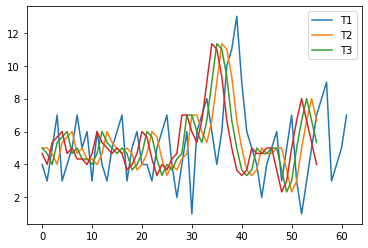

In [31]:
Test = [4,3,5,7,3,4,5,7,5,6,3,6,4,3,5,6,7,3,5,6,4,4,3,5,6,7,4,2,4,6,1,6,7,8,6,4,6,10,11,13,9,6,5,4,2,4,5,6,3,5,7,3,1,3,5,7,8,9,3,4,5,7]
import pandas as pd, matplotlib.pyplot as plt
df = pd.DataFrame(Test, columns = ['Testing'])
plt.plot(df['Testing'])

TA1=[]
TA2 = []
TA3 = []
for i in range(3,len(Test)-3):
    Test_Ave1 = (Test[i] + Test[i-1] + Test[i-2])/3
    Test_Ave2 = (Test[i] + Test[i-1] + Test[i+1])/3
    Test_Ave3 = (Test[i] + Test[i+1] + Test[i+2])/3
    TA1.append(Test_Ave1)
    TA2.append(Test_Ave2)
    TA3.append(Test_Ave3)
    

plt.plot(TA1)
plt.plot(TA2)
plt.plot(TA3)
plt.legend(('T1','T2','T3'))

It can be shown from this test that the heatwave would appear1 day later if using precednet 
data to caluclate the heatwave as Perkens 2013 and Nairn 2009 suggests and this means that if the start of the heat wave occured
on day 47, we would not know until day 48 which in the way of predicting these is not good. But in terms of 
being there at the time and recording this overall data, this is all they had to base it off. And I tend 
to agree with the logic behind it, if doing the T2 approach this may show the heatwave on the day, but the inssue is that is it
long lasting, and the effect health and human wise dnt really occur on that day. T3
is not a great one becasue it predicts the heatwave before it actually occurs therefore 
not a viable soliution.
Based on how observations were recorded IU believe the precident one will be ideal so samee as Nairn and Perkins.and furthermore
it is universally accepted for Australia heatwave definition (Trancoso 2014) this is the first definition

the second definition will be the period that both max and min temperatures are above a __% percentile

The final definition will be the twe3aking of the WSDI index from Alexander 2006 which is the warm spell indictaor
which means that above a certain percentile, average over a period of 3-6 days, does the warm spell exceed the 
90th perctile or something in a row within this, I am still pondering this idea.

The above are relative terms

For the absolute it is much easier, once the absolute temperature thresho;ld is found due to health issue causes
if this is exceeded three or more days then it counts as an absolute heatwave, this should occur in Summer generally




These are a few definitions to think about over the course of the next couple of weeks and refining 
these to get the best output for the duration and onset of the heatwave is vital.


Now some other definitions that explain heatwaves.
So I want to explore beyond the duration aspect with amplitude of the event which is 
the height above the preceding 30 days from the initial beginning of the event, and also
the hottest day of the heatwave. Another metric I want to explore is the amount of 
extra heat added into the region each day with two metrics one with a sum and the other
with the average for the heat wave event. This will also be similar to the area under a half
sinusiodal graph.

So far I can draft up these diferent metrics and when I get to them later on in my coding, 
I will explain them in more detail. I have to terst them so I can acquire the right information.

With the break, once I complete the above, I can figure out jjhow to implement a break.

## Excess Heat Factor

Most People have used the EHF to define the heatwaves, I will be doing that to, within the EHF is a term called the Excess Heat Term, and this is the differecne between the Day In Focus with the Calendar Day Percentile of that day to.

Now we look at the Calendar Day Percentile

In [32]:
Daily_Extremes_1880_2021 = Daily_Extremes_1880_2021.reset_index()
Daily_Extremes_1880_2021


index       date        Max        Min        Avg
0          0 1880-01-01  39.444444  25.777778  32.611111
1          1 1880-01-02  41.333333  23.444444  32.388889
2          2 1880-01-03  41.388889  21.111111  31.250000
3          3 1880-01-04  41.666667  21.722222  31.694444
4          4 1880-01-05  40.000000  18.888889  29.444444
...      ...        ...        ...        ...        ...
51860  51860 2021-12-27  40.600000  26.300000  33.450000
51861  51861 2021-12-28  41.500000  23.900000  32.700000
51862  51862 2021-12-29  39.500000  18.400000  28.950000
51863  51863 2021-12-30  34.200000  17.700000  25.950000
51864  51864 2021-12-31  33.700000  18.600000  26.150000

[51865 rows x 5 columns]

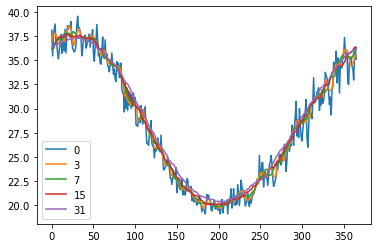

In [33]:
#Lets look at the 1961-1990 baseline climatology at the 85th percentile like we have used
CDP_85_0 = HW_Func.Calendar_Day_Percentile(HW_Func.Date_Splitter(Daily_Extremes_1880_2021,'date'),85,0,Dates,'Max',1961,1990,'Temp Max')
CDP_85_3 = HW_Func.Calendar_Day_Percentile(HW_Func.Date_Splitter(Daily_Extremes_1880_2021,'date'),85,3,Dates,'Max',1961,1990,'Temp Max')
CDP_85_7 = HW_Func.Calendar_Day_Percentile(HW_Func.Date_Splitter(Daily_Extremes_1880_2021,'date'),85,7,Dates,'Max',1961,1990,'Temp Max')
CDP_85_15 = HW_Func.Calendar_Day_Percentile(HW_Func.Date_Splitter(Daily_Extremes_1880_2021,'date'),85,15,Dates,'Max',1961,1990,'Temp Max')
CDP_85_31 = HW_Func.Calendar_Day_Percentile(HW_Func.Date_Splitter(Daily_Extremes_1880_2021,'date'),85,31,Dates,'Max',1961,1990,'Temp Max')
CDP_85_0['Temp Max'].plot()
CDP_85_3['Temp Max'].plot()
CDP_85_7['Temp Max'].plot()
CDP_85_15['Temp Max'].plot()
CDP_85_31['Temp Max'].plot()
plt.legend(['0','3','7','15','31'])


We aim to make sure firstly to remove the significant changes of individual days as a 40C day on 1st of Jan to a 35C day on the 2nd is going to really alter what the relative EHF definition will do, therefore like Perkins-kirkpatrick smoothing it over a 15 day window ensures that the day to day variation exists, but the characteristic of the season is evident to within the CDP. This helps with the EHF definition as heatwaves in Feb will need to be extremely hot as people would have acclimatised to the Januaray extremes are as it is generally hotter in that time of the period.

Therefore

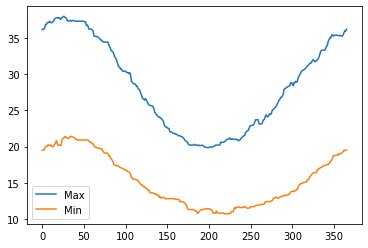

In [34]:
CDPMax_85_7 = HW_Func.Calendar_Day_Percentile(HW_Func.Date_Splitter(Daily_Extremes_1880_2021,'date'),85,7,Dates,'Max',1961,1990,'Temp Max')
CDPMin_85_7 = HW_Func.Calendar_Day_Percentile(HW_Func.Date_Splitter(Daily_Extremes_1880_2021,'date'),85,7,Dates,'Min',1961,1990,'Temp Min')
CDPMax_85_7['Temp Max'].plot()
CDPMin_85_7['Temp Min'].plot()
plt.legend(['Max','Min'])


## Using Different CDP baselines
This part we will explore the different baselines for CDP this will help hone in on first of all the evidence that could state that a warming world has probability increased the extreme temperatures and that different baseline climatologies will mean the heatwaves that we find will be relevent to the climatology and not fixed.

We will explore the difference between the baseline 1911-1940 and 1991-2020 

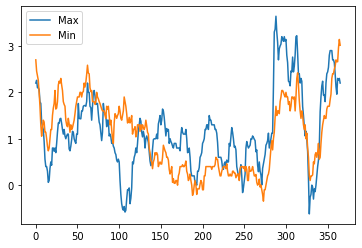

In [35]:
#MAX
CDPMax_1991_2020 = HW_Func.Calendar_Day_Percentile(HW_Func.Date_Splitter(Daily_Extremes_1880_2021,'date'),
                                85,7,Dates,'Max',1991,2020,'Temp Max')
CDPMax_1911_1940 = HW_Func.Calendar_Day_Percentile(HW_Func.Date_Splitter(Daily_Extremes_1880_2021,'date'),
                                85,7,Dates,'Max',1911,1940,'Temp Max')
#MIN
CDPMin_1991_2020 = HW_Func.Calendar_Day_Percentile(HW_Func.Date_Splitter(Daily_Extremes_1880_2021,'date'),
                                85,7,Dates,'Min',1991,2020,'Temp Min')
CDPMin_1911_1940 = HW_Func.Calendar_Day_Percentile(HW_Func.Date_Splitter(Daily_Extremes_1880_2021,'date'),
                                85,7,Dates,'Min',1911,1940,'Temp Min')

CDP_Diff_Max = CDPMax_1991_2020 -CDPMax_1911_1940
CDP_Diff_Min = CDPMin_1991_2020 -CDPMin_1911_1940

CDP_Diff_Max['Temp Max'].plot()
CDP_Diff_Min['Temp Min'].plot()
plt.legend(['Max', 'Min'])



These are interesting plots, for the most part, Max and Min temperature generally follow the same pattern, the only exception is around March to April where there is a massive divergence from the temperatures here, and could this be due to a error in the maximum temperature or somethng, it is hard to know. Now to go into some statistics.

In [36]:
#Number of days above a 0 anomoly
Days_Max = len(CDP_Diff_Max[CDP_Diff_Max['Temp Max']>0])
Days_Min = len(CDP_Diff_Min[CDP_Diff_Min['Temp Min']>0])
print('The number of days that have higher temperatures in 1991-2020 compared to 1911-1940 is {} and {} in the max and min temperatures respectively'.format(Days_Max,Days_Min))

The number of days that have higher temperatures in 1991-2020 compared to 1911-1940 is 340 and 345 in the max and min temperatures respectively


This means that on average 11 months of the year show warmer temperatures in the current climate then in the early 20th century which is strongly consistent with what we expect in a warmer world.

### Contining On with CDP Baselines PT6_PERCENTILE_BASED_ANALYSIS_IMPROVED.PY

This is stuff I had in my literature review, it looks much cleaner then the above functions

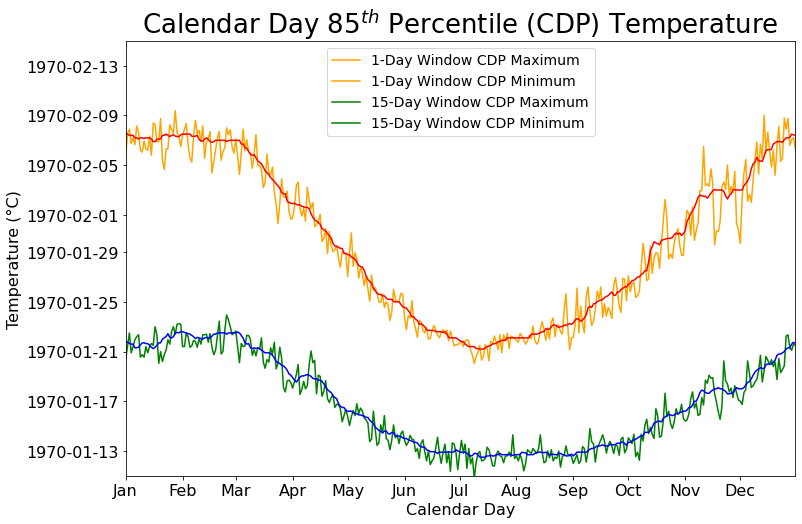

In [37]:
#MAX
CDPMax_1991_2020_1 = HW_Func.Calendar_Day_Percentile(HW_Func.Date_Splitter(Daily_Extremes_1880_2021,'date'),
                                85,0,Dates,'Max',1991,2020,'Temp Max')
CDPMax_1991_2020_15 = HW_Func.Calendar_Day_Percentile(HW_Func.Date_Splitter(Daily_Extremes_1880_2021,'date'),
                                85,7,Dates,'Max',1991,2020,'Temp Max')
#MIN
CDPMin_1991_2020_1 = HW_Func.Calendar_Day_Percentile(HW_Func.Date_Splitter(Daily_Extremes_1880_2021,'date'),
                                85,0,Dates,'Min',1991,2020,'Temp Min')
CDPMin_1991_2020_15 = HW_Func.Calendar_Day_Percentile(HW_Func.Date_Splitter(Daily_Extremes_1880_2021,'date'),
                                85,7,Dates,'Min',1991,2020,'Temp Min')


fig, ax = plt.subplots(figsize = (12,8))
ax.plot(CDPMax_1991_2020_1,color = 'orange')
ax.plot(CDPMin_1991_2020_1,color = 'green')
ax.plot(CDPMax_1991_2020_15, color = 'red')
ax.plot(CDPMin_1991_2020_15, color = 'blue')
ax.legend(['1-Day Window CDP Maximum','1-Day Window CDP Minimum','15-Day Window CDP Maximum','15-Day Window CDP Minimum'],loc=9,prop={'size': 14})

ax.set_title('Calendar Day 85$^{th}$ Percentile (CDP) Temperature',size=26)  
ax.set_xlim([0,365])
ax.set_ylim([10,45])

months_start = [0,31,60,91,121,152,182,213,244,274,305,335]
month_names =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticks(months_start)
ax.set_xticklabels(month_names)

ax.set_xlabel('Calendar Day',size=16)
ax.set_ylabel('Temperature (\N{DEGREE SIGN}C)',size=16)
ax.tick_params(labelsize=16)



15 Days is chosen as it still captures slight variations hwoever it continues to caputre a smoother seaosnal signal.

I explain this above as well


In [38]:
#85th 

#MAX
CDPMax_1991_2020_85 = HW_Func.Calendar_Day_Percentile(HW_Func.Date_Splitter(Daily_Extremes_1880_2021,'date'),
                                85,7,Dates,'Max',1991,2020,'Temp Max')
CDPMax_1911_1940_85 = HW_Func.Calendar_Day_Percentile(HW_Func.Date_Splitter(Daily_Extremes_1880_2021,'date'),
                                85,7,Dates,'Max',1911,1940,'Temp Max')

#MIN
CDPMin_1991_2020_85 = HW_Func.Calendar_Day_Percentile(HW_Func.Date_Splitter(Daily_Extremes_1880_2021,'date'),
                                85,7,Dates,'Min',1991,2020,'Temp Min')
CDPMin_1911_1940_85 = HW_Func.Calendar_Day_Percentile(HW_Func.Date_Splitter(Daily_Extremes_1880_2021,'date'),
                                85,7,Dates,'Min',1911,1940,'Temp Min')



CDP_85_Dif_Max = CDPMax_1991_2020_85 -CDPMax_1911_1940_85
CDP_85_Dif_Min = CDPMin_1991_2020_85 -CDPMin_1911_1940_85








#90th 

#MAX
CDPMax_1991_2020_90 = HW_Func.Calendar_Day_Percentile(HW_Func.Date_Splitter(Daily_Extremes_1880_2021,'date'),
                                90,7,Dates,'Max',1991,2020,'Temp Max')
CDPMax_1911_1940_90 = HW_Func.Calendar_Day_Percentile(HW_Func.Date_Splitter(Daily_Extremes_1880_2021,'date'),
                                90,7,Dates,'Max',1911,1940,'Temp Max')

#MIN
CDPMin_1991_2020_90 = HW_Func.Calendar_Day_Percentile(HW_Func.Date_Splitter(Daily_Extremes_1880_2021,'date'),
                                90,7,Dates,'Min',1991,2020,'Temp Min')
CDPMin_1911_1940_90 = HW_Func.Calendar_Day_Percentile(HW_Func.Date_Splitter(Daily_Extremes_1880_2021,'date'),
                                90,7,Dates,'Min',1911,1940,'Temp Min')


CDP_90_Dif_Max = CDPMax_1991_2020_90 -CDPMax_1911_1940_90
CDP_90_Dif_Min = CDPMin_1991_2020_90 -CDPMin_1911_1940_90


Now we are looking at the different baselines using the 15 day CDP window and comapring old baselines with new baselines

[Text(0, 0, 'Jan'),
 Text(31, 0, 'Feb'),
 Text(60, 0, 'Mar'),
 Text(91, 0, 'Apr'),
 Text(121, 0, 'May'),
 Text(152, 0, 'Jun'),
 Text(182, 0, 'Jul'),
 Text(213, 0, 'Aug'),
 Text(244, 0, 'Sep'),
 Text(274, 0, 'Oct'),
 Text(305, 0, 'Nov'),
 Text(335, 0, 'Dec')]

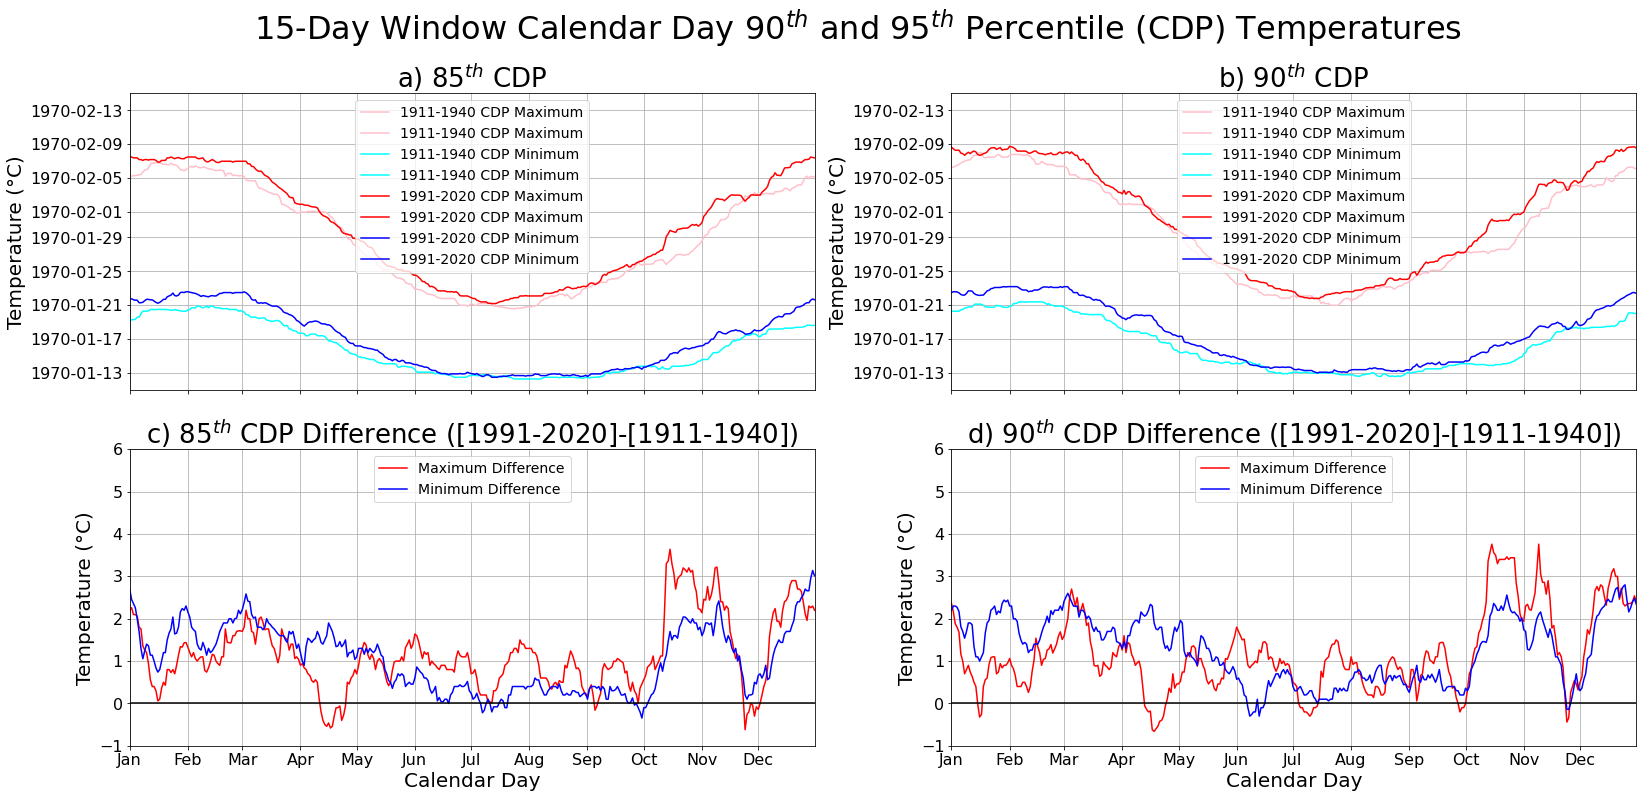

In [39]:
fig, axs = plt.subplots(2, 2, sharex=True,figsize = (27,12))
fig.suptitle('15-Day Window Calendar Day 90$^{th}$ and 95$^{th}$ Percentile (CDP) Temperatures ',fontname="Sans-serif", size=32)

 
axs[0, 0].grid(True, which='both')
axs[1, 0].grid(True, which='both')
axs[1, 1].grid(True, which='both')
axs[0, 1].grid(True, which='both')

axs[0, 0].plot(CDPMax_1911_1940_85,color = 'pink',label = '1911-1940 CDP Maximum')
axs[0, 0].plot(CDPMin_1911_1940_85, color = 'cyan', label = '1911-1940 CDP Minimum')
axs[0, 0].plot(CDPMax_1991_2020_85, color ='red', label = '1991-2020 CDP Maximum')
axs[0, 0].plot(CDPMin_1991_2020_85, color ='blue', label = '1991-2020 CDP Minimum')
axs[0, 0].set_title('a) 85$^{th}$ CDP',size=26)
axs[0, 0].legend(loc=9,prop={'size': 14})  
axs[0, 0].set_xlim([0,365])
axs[0, 0].set_ylim([10,45])
axs[0, 0].set_ylabel('Temperature (\N{DEGREE SIGN}C)',size=20)
axs[0, 0].tick_params(labelsize=16)


axs[1, 0].plot(CDP_85_Dif_Max['Temp Max'],color ='red')
axs[1, 0].plot(CDP_85_Dif_Min['Temp Min'], color ='blue')
axs[1, 0].set_title('c) 85$^{th}$ CDP Difference ([1991-2020]-[1911-1940])',size=26)
axs[1, 0].legend(['Maximum Difference','Minimum Difference'],loc=9,prop={'size': 14})
axs[1, 0].axhline(y=0, color='k')
axs[1, 0].set_xlim([0,365])
axs[1, 0].set_ylim([-1,6])
axs[1, 0].set_xlabel('Calendar Day',size=20)
axs[1, 0].set_ylabel('Temperature (\N{DEGREE SIGN}C)',size=20)
axs[1, 0].tick_params(labelsize=16)

axs[0, 1].plot(CDPMax_1911_1940_90,color = 'pink',label = '1911-1940 CDP Maximum')
axs[0, 1].plot(CDPMin_1911_1940_90, color = 'cyan',label = '1911-1940 CDP Minimum')
axs[0, 1].plot(CDPMax_1991_2020_90, color = 'red',label = '1991-2020 CDP Maximum')
axs[0, 1].plot(CDPMin_1991_2020_90, color = 'blue',label = '1991-2020 CDP Minimum')
axs[0, 1].set_title('b) 90$^{th}$ CDP',size=26)
axs[0, 1].legend(loc=9,prop={'size': 14})  
axs[0, 1].set_xlim([0,365])
axs[0, 1].set_ylim([10,45])
axs[0, 1].set_ylabel('Temperature (\N{DEGREE SIGN}C)',size=20)
axs[0, 1].tick_params(labelsize=16)

axs[1, 1].plot(CDP_90_Dif_Max['Temp Max'],color ='red')
axs[1, 1].plot(CDP_90_Dif_Min['Temp Min'], color = 'blue')
axs[1, 1].set_title('d) 90$^{th}$ CDP Difference ([1991-2020]-[1911-1940])',size=26)
axs[1, 1].legend(['Maximum Difference','Minimum Difference'],loc=9,prop={'size': 14})
axs[1, 1].axhline(y=0, color='k')
axs[1, 1].set_xlim([0,365])
axs[1, 1].set_ylim([-1,6])
axs[1, 1].set_xlabel('Calendar Day',size=20)
axs[1, 1].set_ylabel('Temperature (\N{DEGREE SIGN}C)',size=20)
axs[1, 1].tick_params(labelsize=16)

months_start = [0,31,60,91,121,152,182,213,244,274,305,335]
month_names =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
axs[0,0].set_xticks(months_start)
axs[0,0].set_xticklabels(month_names)
axs[0,1].set_xticks(months_start)
axs[0,1].set_xticklabels(month_names)
axs[1,0].set_xticks(months_start)
axs[1,0].set_xticklabels(month_names,size=16)
axs[1,1].set_xticks(months_start)
axs[1,1].set_xticklabels(month_names,size=16)

What we can see is that both the 85th and 90th percentile and on average they both show that increase in the recent climatoligcal period compared to the past therefore demonstrating this agreement with warmer world from climate change.

### Choosing the right Percentile with the heatwave function and the right baseline

#### Baseline - PT_16_PLOTS_FOR_CONFERENCE

What we know is that obviously a baseline will affect how many heatwaves are going to find, this is clearly evidenct as a warming world more recent times are seeing 1 to 2C warmer on average in the extreme temperatures, so the code below will exploit what i mean in detail.

This is the bar graph where I find the number of heatwave events each period

1911-1940

1951-1980

1991-2020*

For different base periods

1911-1940,

1916-1945 etc etc

In [40]:
Daily_Extremes_1880_2021 

index       date        Max        Min        Avg  year  month  day
0          0 1880-01-01  39.444444  25.777778  32.611111  1880      1    1
1          1 1880-01-02  41.333333  23.444444  32.388889  1880      1    2
2          2 1880-01-03  41.388889  21.111111  31.250000  1880      1    3
3          3 1880-01-04  41.666667  21.722222  31.694444  1880      1    4
4          4 1880-01-05  40.000000  18.888889  29.444444  1880      1    5
...      ...        ...        ...        ...        ...   ...    ...  ...
51860  51860 2021-12-27  40.600000  26.300000  33.450000  2021     12   27
51861  51861 2021-12-28  41.500000  23.900000  32.700000  2021     12   28
51862  51862 2021-12-29  39.500000  18.400000  28.950000  2021     12   29
51863  51863 2021-12-30  34.200000  17.700000  25.950000  2021     12   30
51864  51864 2021-12-31  33.700000  18.600000  26.150000  2021     12   31

[51865 rows x 8 columns]

In [41]:
import sys
sys.path.append(r"C:\Users\jarra\Desktop\Masters\Heatwave_Project")
import pandas as pd
import PT13_Functions_For_Masters_New_Test as HW_Func
#First lets do the moving base period
LowerBoundBP = np.arange(1911,1991+1,5)
UpperBoundBP = np.arange(1940,2020+1,5)

#cCapture the extended summer
April = 4
October = 10
StartDay = 1
EndDay = 30

#Now add a for loop into this
Heatwave_T = []
Heatwave_E = []
Heatwave_M = []
Heatwave_L = []
for i in range(0,len(UpperBoundBP)):
    #Find the heatwaves
    Heatwaves, CDP_periods, D, E  =  HW_Func.Heatwave_Function_Perth_Specific(Daily_Extremes_1880_2021,'date',[1800,2030], [LowerBoundBP[i],UpperBoundBP[i]],['Max','Min'],85,7,Dates)
    
    #Now split into 3 periods
    Heatwaves = Heatwaves.set_index('date')
    
    Heatwaves_Early = Heatwaves.loc['1911-10-1':'1940-4-30']
    Heatwaves_Mid = Heatwaves.loc['1951-10-1':'1980-4-30']
    Heatwaves_Late = Heatwaves.loc['1991-10-1':'2020-4-30']

    
    #Number of heatwaves for each period
    events_t = Heatwaves['id'].max() - Heatwaves['id'].min()
    events_e = Heatwaves_Early['id'].max() - Heatwaves_Early['id'].min()
    events_m = Heatwaves_Mid['id'].max() - Heatwaves_Mid['id'].min()
    events_l = Heatwaves_Late['id'].max() - Heatwaves_Late['id'].min()
    
    #Append the number to the rest
    Heatwave_T.append(events_t)
    Heatwave_E.append(events_e)
    Heatwave_M.append(events_m)
    Heatwave_L.append(events_l)
  
    
    


If climate change wasnt effecting heatwaves we would see no change in the number of heatwaves events in total and not change in the number of heatwave events in 
each decade

If climate change is occuring I expect to see the change in the number of heatwave events begin in the 1931-1960 periods and begun to decrease as hotter temperatures
mean that the older periods will not have as effective heatwaves as the current period. That is my hypthosesis

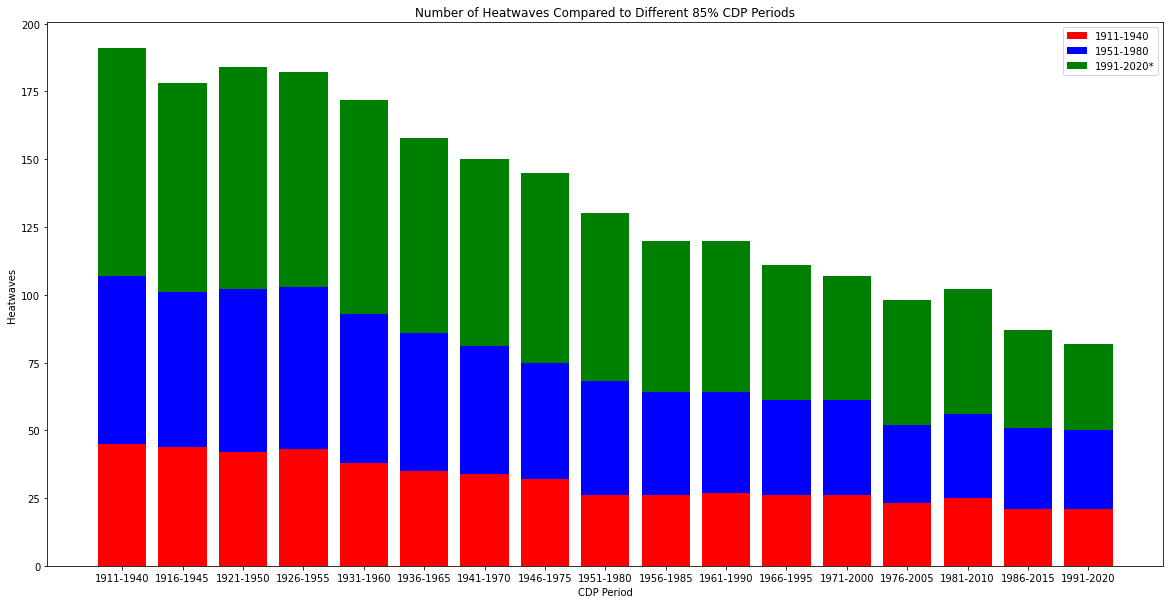

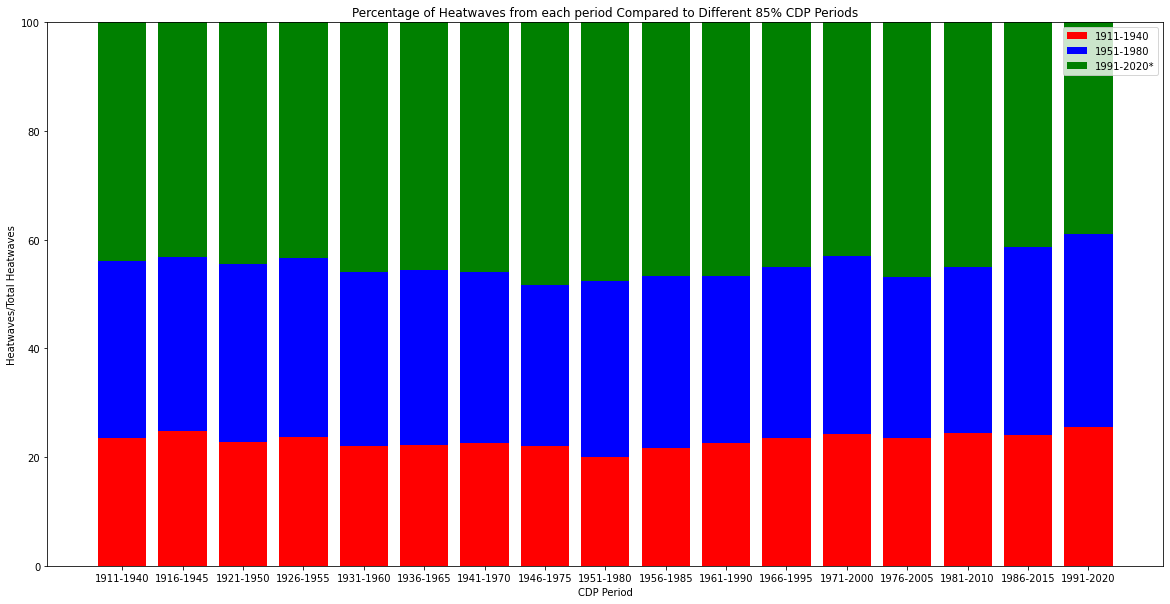

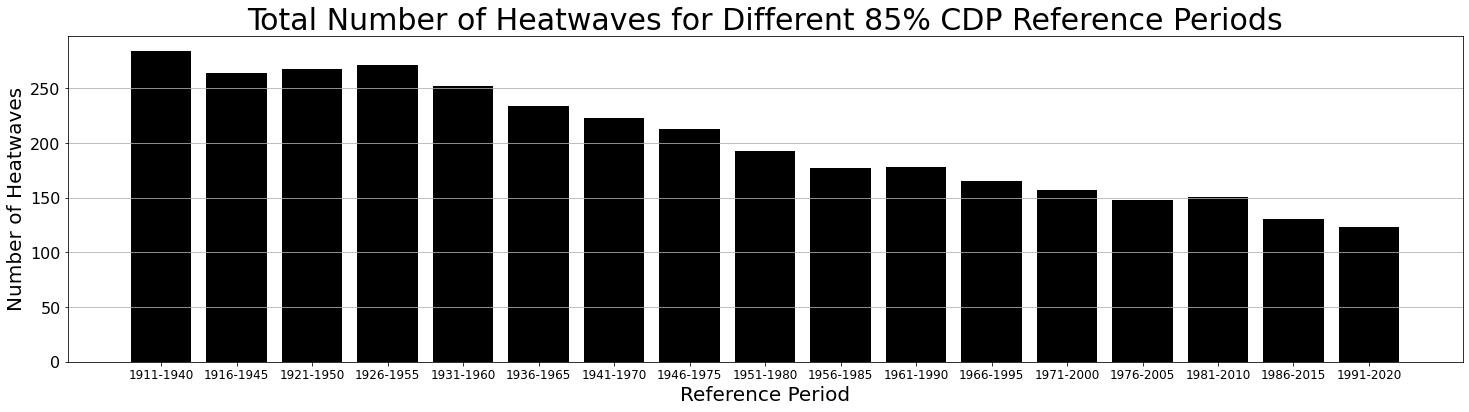

In [42]:
Base_Periods = []
for i in range(0,len(UpperBoundBP)):
    xx = '{}-{}'.format(LowerBoundBP[i],UpperBoundBP[i])
    Base_Periods.append(xx)
    
plt.figure(figsize = (20,10))   
plt.bar(Base_Periods, Heatwave_E, color='r')
plt.bar(Base_Periods, Heatwave_M, bottom=Heatwave_E, color='b')
plt.bar(Base_Periods, Heatwave_L, bottom=np.add(Heatwave_M,Heatwave_E), color='g')

plt.xlabel("CDP Period")
plt.ylabel("Heatwaves")
plt.legend(["1911-1940", "1951-1980", "1991-2020*"])
plt.title("Number of Heatwaves Compared to Different 85% CDP Periods")
plt.show()


#Percentage based
Total_Heatwaves = np.add(np.add(Heatwave_M,Heatwave_E),Heatwave_L)
Percentage_E = np.multiply(np.divide(Heatwave_E,Total_Heatwaves),100)
Percentage_M = np.multiply(np.divide(Heatwave_M,Total_Heatwaves),100)
Percentage_L = np.multiply(np.divide(Heatwave_L,Total_Heatwaves),100)


Base_Periods = []
for i in range(0,len(UpperBoundBP)):
    xx = '{}-{}'.format(LowerBoundBP[i],UpperBoundBP[i])
    Base_Periods.append(xx)
    
plt.figure(figsize = (20,10))   
plt.bar(Base_Periods, Percentage_E, color='r')
plt.bar(Base_Periods, Percentage_M, bottom=Percentage_E, color='b')
plt.bar(Base_Periods, Percentage_L, bottom=np.add(Percentage_E,Percentage_M), color='g')

plt.xlabel("CDP Period")
plt.ylabel("Heatwaves/Total Heatwaves")
plt.legend(["1911-1940", "1951-1980", "1991-2020*"])
plt.title("Percentage of Heatwaves from each period Compared to Different 85% CDP Periods")
plt.ylim([0,100])
plt.show()

#%%

Base_Periods = []
for i in range(0,len(UpperBoundBP)):
    xx = '{}-{}'.format(LowerBoundBP[i],UpperBoundBP[i])
    Base_Periods.append(xx)
    
plt.figure(figsize = (25,6))   
plt.bar(Base_Periods, Heatwave_T, color='black')


plt.xlabel("Reference Period",fontsize = 20)
plt.ylabel("Number of Heatwaves",fontsize = 20)
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=16)
plt.grid(axis = 'y')

plt.title("Total Number of Heatwaves for Different 85% CDP Reference Periods",fontsize =30)
plt.show()





From my hypothesis I was bang on, the number of heatwaves remained with my statement of that we will see a drop from a CDP climatoloigcal period of 1931-1960 BUT NO climate change has always been increasing therefore I am wrong with this assumption  but what we do know is that the over the different baseline periods we expect a decrease in the number of heatwaves, only 3 instances where this doesnt occur, from 1916/45-1926/55 and 1956/85-1961/1990 and 1971/2000-1981/2010
But overall the number of heatwaves has decreased by pretty much half over the range of baseline climatological periods.

Due to that my heatwave deifnition is relative we can see that the number of heatwave events by percentage show roughly the same in each period of focus, which is quite interesting.

We dont want to oversaturate the number of heatwaves, and in addition to this, sure they are quality checked but earlier baselines may not be as accurate as more recent baselines, Therefroe we know that the BOM and WMO have baselines that are already guaranteed which is great

WMO - 1981-2010 # ABOUT 150
BOM - 1961-1990 # ABOUT 175

Lets have a comparison here


#### COMPARISON WMO AND BOM BASELINES WITH DIFFERENT PERCENTILES

In [43]:
HW_80_B, C, D, E  =  HW_Func.Heatwave_Function_Perth_Specific(Daily_Extremes_1880_2021,'date',[1800,2030], 
                                                                [1961,1990],['Max','Min'],80,7,Dates)
HW_825_B, C, D, E  =  HW_Func.Heatwave_Function_Perth_Specific(Daily_Extremes_1880_2021,'date',[1800,2030], 
                                                                [1961,1990],['Max','Min'],82.5,7,Dates)
HW_85_B, C, D, E  =  HW_Func.Heatwave_Function_Perth_Specific(Daily_Extremes_1880_2021,'date',[1800,2030], 
                                                                [1961,1990],['Max','Min'],85,7,Dates)
HW_875_B, C, D, E  =  HW_Func.Heatwave_Function_Perth_Specific(Daily_Extremes_1880_2021,'date',[1800,2030], 
                                                                [1961,1990],['Max','Min'],87.5,7,Dates)
HW_90_B, C, D, E  =  HW_Func.Heatwave_Function_Perth_Specific(Daily_Extremes_1880_2021,'date',[1800,2030], 
                                                                [1961,1990],['Max','Min'],90,7,Dates)
HW_925_B, C, D, E  =  HW_Func.Heatwave_Function_Perth_Specific(Daily_Extremes_1880_2021,'date',[1800,2030], 
                                                                [1961,1990],['Max','Min'],92.5,7,Dates)
HW_95_B, C, D, E  =  HW_Func.Heatwave_Function_Perth_Specific(Daily_Extremes_1880_2021,'date',[1800,2030], 
                                                                [1961,1990],['Max','Min'],95,7,Dates)
HW_975_B, C, D, E  =  HW_Func.Heatwave_Function_Perth_Specific(Daily_Extremes_1880_2021,'date',[1800,2030], 
                                                                [1961,1990],['Max','Min'],97.5,7,Dates)
#HW_99_B, C, D, E  =  HW_Func.Heatwave_Function_Perth_Specific(Daily_Extremes_1880_2021,'date',[1800,2030], 
                                                                [1961,1990],['Max','Min'],99,7,Dates)

HW_80_W, C, D, E  =  HW_Func.Heatwave_Function_Perth_Specific(Daily_Extremes_1880_2021,'date',[1800,2030], 
                                                                [1981,2010],['Max','Min'],80,7,Dates)
HW_825_W, C, D, E  =  HW_Func.Heatwave_Function_Perth_Specific(Daily_Extremes_1880_2021,'date',[1800,2030], 
                                                                [1981,2010],['Max','Min'],82.5,7,Dates)
HW_85_W, C, D, E  =  HW_Func.Heatwave_Function_Perth_Specific(Daily_Extremes_1880_2021,'date',[1800,2030], 
                                                                [1981,2010],['Max','Min'],85,7,Dates)
HW_875_W, C, D, E  =  HW_Func.Heatwave_Function_Perth_Specific(Daily_Extremes_1880_2021,'date',[1800,2030], 
                                                                [1981,2010],['Max','Min'],87.5,7,Dates)
HW_90_W, C, D, E  =  HW_Func.Heatwave_Function_Perth_Specific(Daily_Extremes_1880_2021,'date',[1800,2030], 
                                                                [1981,2010],['Max','Min'],90,7,Dates)
HW_925_W, C, D, E  =  HW_Func.Heatwave_Function_Perth_Specific(Daily_Extremes_1880_2021,'date',[1800,2030], 
                                                                [1981,2010],['Max','Min'],92.5,7,Dates)
HW_95_W, C, D, E  =  HW_Func.Heatwave_Function_Perth_Specific(Daily_Extremes_1880_2021,'date',[1800,2030], 
                                                                [1981,2010],['Max','Min'],95,7,Dates)
HW_975_W, C, D, E  =  HW_Func.Heatwave_Function_Perth_Specific(Daily_Extremes_1880_2021,'date',[1800,2030], 
                                                                [1981,2010],['Max','Min'],97.5,7,Dates)
#HW_99_W, C, D, E  =  HW_Func.Heatwave_Function_Perth_Specific(Daily_Extremes_1880_2021,'date',[1800,2030], 
                                                                [1981,2010],['Max','Min'],99,7,Dates)

IndentationError: unexpected indent (Temp/ipykernel_18156/247160986.py, line 18)

In [ ]:
HW = [[HW_80_W['id'].max(),
HW_825_W['id'].max(),
HW_85_W['id'].max(),
HW_875_W['id'].max(),
HW_90_W['id'].max(),
HW_925_W['id'].max(),
HW_95_W['id'].max(),
HW_975_W['id'].max()],
[HW_80_B['id'].max(),
HW_825_B['id'].max(),
HW_85_B['id'].max(),
HW_875_B['id'].max(),
HW_90_B['id'].max(),
HW_925_B['id'].max(),
HW_95_B['id'].max(),
HW_975_B['id'].max()]]

In [ ]:
HW

What we can see is that the BOM version has at least 20% more heatwaves then the WMO, not only that the 80th percentile oversaturates the heatwaves therefore most likely to low of a value, the 85th percentile has 152 and 179 heatwaves respectively but this is with the 1880-1900 HW stuff in it which we know are wrong, the 90th percentile 81 and 90 heatwave events, which are respectable however it most likely will not help with the trends as this shows under 1 heatwave a year

Therefore we elected to use the 85th percentile for the heatwaves with the BOM standard baseline which is still used by Austrlaian research in the current period, therefore why would we want to diverge from that.

In [ ]:
#BOM BASELINE 85TH PERCENTILE

HW_85_W

## 5. 19TH CENTURY HEATWAVES

Now my goal in this section is to use methods to identify heatwaves in the 19th century from the subdaily records.
There are three main methods that I will be using.

### The Regression Way

In order to use the regression way we need to know the location of the 1830-1875 dataset, which we know is around the Swan River area, or more closely Perth Gardens. Unfortunately the observtory has been inactive since the 1930's and in addition accessing the requries subdaily and max and min data will require time and money whcih I do not have. This means that the Perth Regional Office is the next closest observation point which is about 2km East of the Perth Gardens. What we do have is the Perth Regional Office Sub-daily Dataset and daily extremes form 1967 to 1992 so around 25 years and enough data points to create a link between Sub-daily and Daily extremes by regression.

There are issues with this, since it is 2km away we cannot assume that it will be a 1:1 match and since we dont have access to Perth Gardens we can only assume there may be a 1 to 2C error from the two observations and that the Fremantle doctor and frontal systems will arrive slightly earlier at Perth Gardens then the Perth Regional Office which will ultimately slightly affect our guess at what the old observations may actually show in heatwave context. However these are issues that are unavoidable and we have to make do with what resources we have. 

#### ACORN-SAT 1967-1992 COMPARISION WITH PERTH REGIONAL OFFICE 1967-1992 DAILY EXTREMES - PT11_1911-2021_HEATWAVE_ANALYSIS

In [8]:
#LOAD ACORN_SAT DATA IN AND GET THE HEATWAVES OUT
AS_HW,D,E,F = HW_Func.Heatwave_Function_Perth_Specific(Daily_Extremes_1880_2021,'date',[1800,2030], 
                                                                [1961,1990],['Max','Min'],85,7,Dates)


In [9]:
#SET INDEX TO DATE AND GET 1967 JAN 1 TO 1992 DEC 31
AS_HW = AS_HW.set_index('date')
AS_67_92_HW = AS_HW.loc['1967-01-01':'1992-12-31']

In [10]:
#Now only get the months of the Extended Summer Out
AS_67_92_HW = pd.concat([AS_67_92_HW[AS_67_92_HW.index.month==11], AS_67_92_HW[AS_67_92_HW.index.month==12], AS_67_92_HW[AS_67_92_HW.index.month==1], AS_67_92_HW[AS_67_92_HW.index.month==2], AS_67_92_HW[AS_67_92_HW.index.month==3],], axis = 0)

In [11]:
#Lets break it into Max and Min
AS_67_92_HW_Max = AS_67_92_HW['Max']
AS_67_92_HW_Min = AS_67_92_HW['Min']

0.6880624667001267


Text(0, 0.5, 'Max')

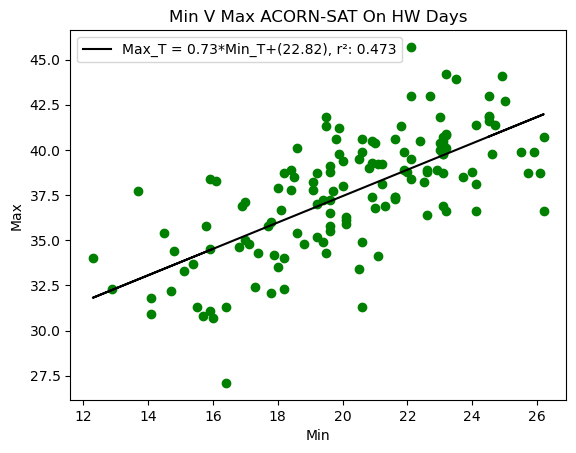

In [12]:
#Line of Best Fit between daily extremes on Heatwave Days, interested to see it and plot this
a_daily, b_daily = np.polyfit(AS_67_92_HW_Min, AS_67_92_HW_Max, 1)
#add points to plot
plt.scatter(AS_67_92_HW_Min, AS_67_92_HW_Max, color = 'green')
corr_daily, _ = pearsonr(AS_67_92_HW_Min, AS_67_92_HW_Max)
#add line of best fit to plot
plt.plot(AS_67_92_HW_Min, a_daily*AS_67_92_HW_Min+b_daily,color ='black',label = 'Max_T = {}*Min_T+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a_daily, 2),round(b_daily, 2),round(np.power(corr_daily,2), 3)))   
print(corr_daily)
plt.legend()
plt.title('Min V Max ACORN-SAT On HW Days')
plt.xlabel('Min')
plt.ylabel('Max')


We can see a moderate agreement between max and min so we know generally that the max and min will be in the same realm where the warmer max value the warmer the corresponding min value will be with medium confidence. There is about a 10 degree difference so its still quite large for these heatwave days

In [13]:
#Get daily extremes to datetime
AS_DE =Daily_Extremes_1880_2021
AS_DE['date'] = pd.to_datetime(AS_DE['date'],format="%Y/%m/%d")

#Now same as above
AS_DE = AS_DE.set_index('date')
AS_67_92_DE = AS_DE.loc['1967-01-01':'1992-12-31']


In [14]:
#Now only get the months of the Extended Summer Out
AS_67_92_DE = pd.concat([AS_67_92_DE[AS_67_92_DE.index.month==11], AS_67_92_DE[AS_67_92_DE.index.month==12], AS_67_92_DE[AS_67_92_DE.index.month==1], AS_67_92_DE[AS_67_92_DE.index.month==2], AS_67_92_DE[AS_67_92_DE.index.month==3],], axis = 0)

In [15]:
#Lets break it into Max and Min
AS_67_92_DE_Max = AS_67_92_DE['Max']
AS_67_92_DE_Min = AS_67_92_DE['Min']

In [1]:
#Line of Best Fit between daily extremes on Heatwave Days, interested to see it and plot this
a_daily_DE, b_daily_DE = np.polyfit(AS_67_92_DE_Min, AS_67_92_DE_Max, 1)
#add points to plot
plt.scatter(AS_67_92_DE_Min, AS_67_92_DE_Max, color = 'green')
corr_daily_DE, _ = pearsonr(AS_67_92_DE_Min, AS_67_92_DE_Max)
#add line of best fit to plot
plt.plot(AS_67_92_DE_Min, a_daily_DE*AS_67_92_DE_Min+b_daily_DE,color ='black',label = 'Max_T = {}*Min_T+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a_daily_DE, 2),round(b_daily_DE, 2),round(np.power(corr_daily,2), 3)))   
print(corr_daily_DE)
plt.legend()
plt.title('Min V Max ACORN-SAT On Ext Summer Days')
plt.xlabel('Min')
plt.ylabel('Max')

NameError: name 'np' is not defined

What we see here is that the correlation between max and min decreasing singificantly compared to heatwave days, I hypothesis thay the reason behind this is because that due to the synotopic setup that is usually keeping everything consistant for 3+ days in a heatwave, the temperature cools and rising quickly at a similar rate everday hwowver an increase in energy to which will push the heatwave into hotter territory the longer it lasts until a frontal system or something breaks its. Any way more on that in Part 7. of this script.

Text(0, 0.5, 'Maximum Temperature')

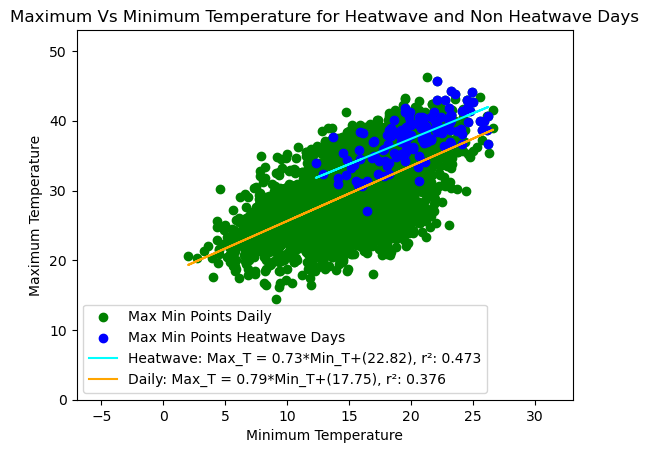

In [17]:
# Now plot both together
plt.scatter(AS_67_92_DE_Min, AS_67_92_DE_Max,color = 'green',label = 'Max Min Points Daily')
plt.scatter(AS_67_92_HW_Min, AS_67_92_HW_Max,color = 'blue', label = 'Max Min Points Heatwave Days')
plt.plot(AS_67_92_HW_Min, a_daily*AS_67_92_HW_Min+b_daily,color ='aqua',label = 'Heatwave: Max_T = {}*Min_T+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a_daily, 2),round(b_daily, 2),round(np.power(corr_daily,2), 3)))
plt.plot(AS_67_92_DE_Min, a_daily_DE*AS_67_92_DE_Min+b_daily_DE,color ='orange',label = 'Daily: Max_T = {}*Min_T+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a_daily_DE, 2),round(b_daily_DE, 2),round(np.power(corr_daily_DE,2), 3)))   
plt.xlim([-7,33])
plt.ylim([0,53])
plt.legend(fontsize = 10,loc = 0 )
plt.title('Maximum Vs Minimum Temperature for Heatwave and Non Heatwave Days')
plt.xlabel('Minimum Temperature')
plt.ylabel('Maximum Temperature')


What is intriguing is that the heatwaves are generally on the upper side of the Daily Extremes in the extended summer and I beleoev that the days under would be break days where some releif has occurred or the end of a heatwave event, or even the first day as the min is calculated based on the 9am of day-1 to 9am of day which would be before a heatwave event.

#### Frequency Comparison

(0.0, 250.0)

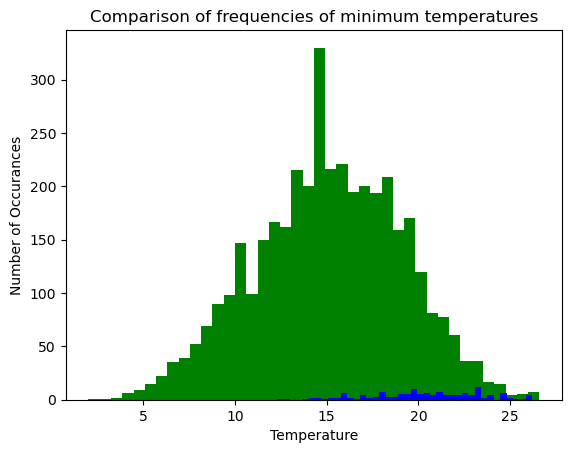

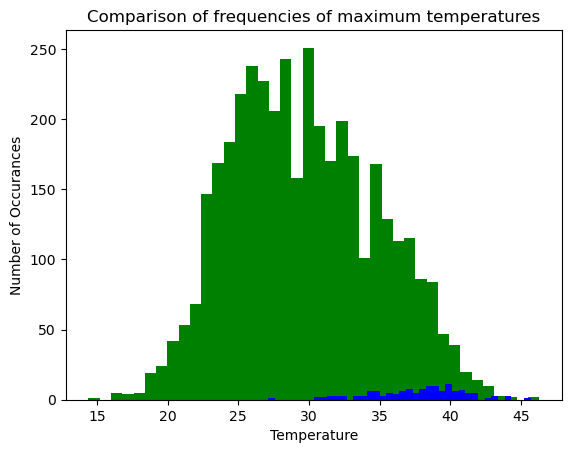

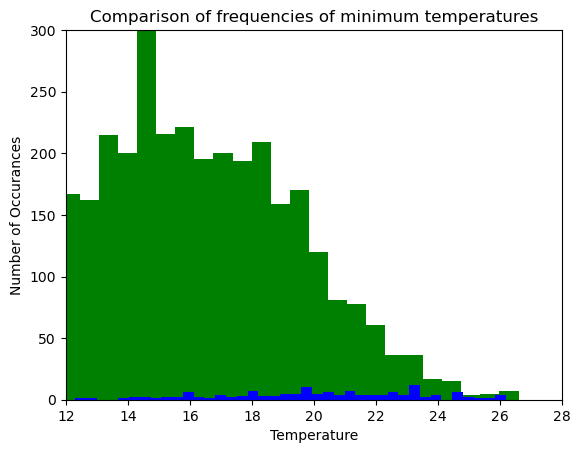

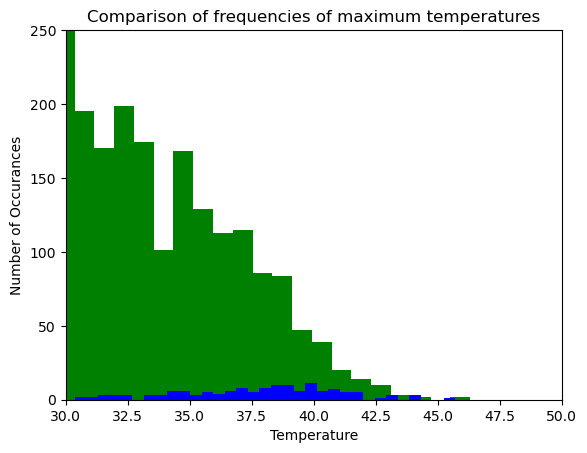

In [18]:
plt.figure(4)
plt.hist(AS_67_92_DE_Min,bins = 40,label = 'Daily',color = 'green')
plt.hist(AS_67_92_HW_Min,bins = 40, label = 'Heatwave Days',color = 'blue')
plt.title('Comparison of frequencies of minimum temperatures')
plt.xlabel('Temperature')
plt.ylabel('Number of Occurances')

plt.figure(5)
plt.hist(AS_67_92_DE_Max,bins = 40,label = 'Daily',color = 'green')
plt.hist(AS_67_92_HW_Max,bins = 40, label = 'Heatwave Days',color = 'blue')
plt.title('Comparison of frequencies of maximum temperatures')
plt.xlabel('Temperature')
plt.ylabel('Number of Occurances')

'''
At a closer look
'''
plt.figure(6)
plt.hist(AS_67_92_DE_Min,bins = 40,label = 'Daily',color = 'green')
plt.hist(AS_67_92_HW_Min,bins = 40, label = 'Heatwave Days',color = 'blue')
plt.title('Comparison of frequencies of minimum temperatures')
plt.xlabel('Temperature')
plt.ylabel('Number of Occurances')
plt.xlim([12,28])
plt.ylim([0,300])

plt.figure(7)
plt.hist(AS_67_92_DE_Max,bins = 40,label = 'Daily',color = 'green')
plt.hist(AS_67_92_HW_Max,bins = 40, label = 'Heatwave Days',color = 'blue')
plt.title('Comparison of frequencies of maximum temperatures')
plt.xlabel('Temperature')
plt.ylabel('Number of Occurances')

plt.xlim([30,50])
plt.ylim([0,250])

#Count of 15C values and do a few other numbers nearby

I dont think I get a lot out of this diagram, its kind of explained in the scatter plot

### Now the Perth Regional Office

Why we need to use the PRO, is because that we want to check if its a 1:1 ratio in the extended summer period with the ACORN-SAT, if this is the case then we can assume that the heatwaves we find in the PRO and in the historical dataset will most likely be found if the homogenisation from ACORN-SAT to the early 19th century.


In [19]:
#Now we can merge the PRO with ACORN-SAT
#There was extra infomration so had to remove
AS= AS_DE.rename(columns={'Max':'ACORN Max'})
AS= AS.rename(columns={'Min':'ACORN Min'})
del AS['Avg']
del AS['year']
del AS['month']
del AS['day']

In [20]:
#Merge them together
AC_PRO_DE = pd.merge(left = AS,right  =PRO_DE, left_index=True,right_index=True).dropna()
AC_PRO_DE = AC_PRO_DE.loc["1967-01-01":"1992-3-31"]

#### The Comparison ACORN with PRO in HW and the Extended Record

Text(0, 0.5, 'ACORN SAT MAX TEMP')

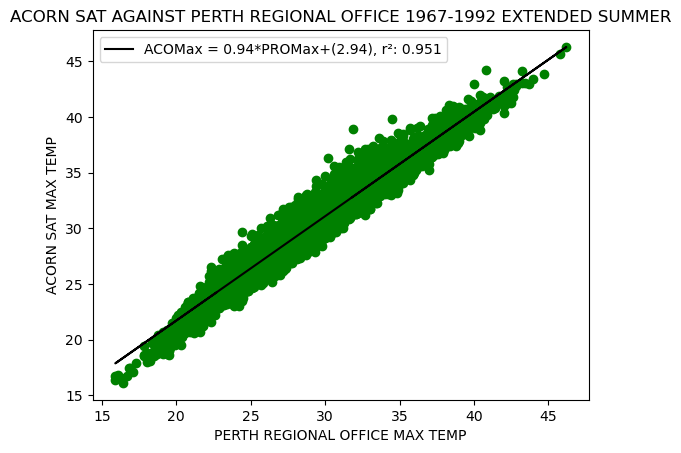

In [21]:
#Max
AC_PRO_ES = pd.concat([AC_PRO_DE[AC_PRO_DE.index.month==11], AC_PRO_DE[AC_PRO_DE.index.month==12], AC_PRO_DE[AC_PRO_DE.index.month==1], AC_PRO_DE[AC_PRO_DE.index.month==2], AC_PRO_DE[AC_PRO_DE.index.month==3],], axis = 0)
ACORN_SAT_Mx =AC_PRO_ES['ACORN Max']
REG_OFFICE_Mx =AC_PRO_ES['PRO Max']

#find line of best fit
a1, b1 = np.polyfit(REG_OFFICE_Mx, ACORN_SAT_Mx, 1)
#add points to plot
plt.scatter(REG_OFFICE_Mx, ACORN_SAT_Mx,color = 'green')
corr, _ = pearsonr(REG_OFFICE_Mx, ACORN_SAT_Mx)
#add line of best fit to plot
plt.plot(REG_OFFICE_Mx, a1*REG_OFFICE_Mx+b1,color ='black',label = 'ACOMax = {}*PROMax+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a1, 2),round(b1, 2),round(np.power(corr,2), 3)))   
plt.legend()
plt.title('ACORN SAT AGAINST PERTH REGIONAL OFFICE 1967-1992 EXTENDED SUMMER')
plt.xlabel('PERTH REGIONAL OFFICE MAX TEMP')
plt.ylabel('ACORN SAT MAX TEMP')

This is very promising here, what we generally see is a 1:1 ratio for the ACORN_MAX we can see that with a high confidence of 0.951 that indeed the Max of PRO can be explained by the ACORN-SAT values. In the Max ACORN_SAT is generally around 2C warmer then the PRO.

Text(0, 0.5, 'ACORN SAT MIN TEMP')

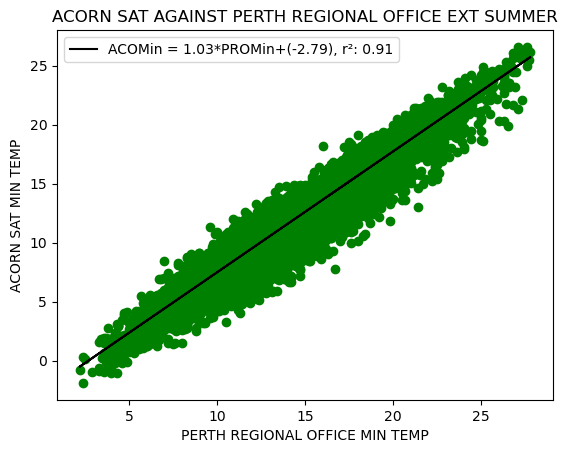

In [22]:
# Min
ACORN_SAT_Mn =AC_PRO_DE['ACORN Min']
REG_OFFICE_Mn =AC_PRO_DE['PRO Min']

#find line of best fit
a2, b2 = np.polyfit(REG_OFFICE_Mn, ACORN_SAT_Mn, 1)
#add points to plot
plt.scatter(REG_OFFICE_Mn, ACORN_SAT_Mn,color = 'green')
corr, _ = pearsonr(REG_OFFICE_Mn, ACORN_SAT_Mn)
#add line of best fit to plot
plt.plot(REG_OFFICE_Mn, a2*REG_OFFICE_Mn+b2,color ='black',label = 'ACOMin = {}*PROMin+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a2, 2),round(b2, 2),round(np.power(corr,2), 3)))   
plt.legend()
plt.title('ACORN SAT AGAINST PERTH REGIONAL OFFICE EXT SUMMER')
plt.xlabel('PERTH REGIONAL OFFICE MIN TEMP')
plt.ylabel('ACORN SAT MIN TEMP')

This is another very promising sign where the min is a 1:1 ratio. but what is interesting its almost 3 degree cooler the min of the ACORN-SAT, but this doenst affect anything tho,

For both max and min we only care about the correlation which both are high and positive and this means that when we find the relationship to the max and min of the PRO to the extremes we generally should see a heatwave from the PRO show up in the ACORN-SAT as well.

In [23]:
HW_AC_PRO = pd.merge(left = AS_HW,right  =AC_PRO_ES,left_index=True,right_index=True  )

HW_AC_PRO

id   Max   Min    Avg  85 percentile daily Max  \
date                                                          
1967-11-07   84  30.7  16.0  23.35                    30.40   
1967-11-08   84  30.8  15.7  23.25                    30.50   
1967-11-09   84  33.7  15.4  24.55                    30.54   
1967-11-10   84  33.4  20.5  26.95                    30.60   
1967-12-02   85  34.8  17.1  25.95                    33.30   
...         ...   ...   ...    ...                      ...   
1991-01-30  118  44.1  24.9  34.50                    37.70   
1991-01-31  118  45.7  22.1  33.90                    37.44   
1991-12-15  119  35.8  15.8  25.80                    35.24   
1991-12-16  119  40.6  19.8  30.20                    35.34   
1991-12-17  119  41.4  24.7  33.05                    35.34   

            85 percentile daily Min  Excess Heat Factor Max T  \
date                                                            
1967-11-07                    14.90                  1.670000   
1967-11-08                    14.94                  1.592000   
1967-11-09                    15.04                 20.834933   
1967-11-10                    15.04                 20.020000   
1967-12-02                    17.20                  9.405000   
...                             ...                       ...   
1991-01-30                    21.20                 58.538667   
1991-01-31                    21.20                 98.762067   
1991-12-15                    18.70                  2.654400   
1991-12-16                    18.70                 45.499000   
1991-12-17                    18.74                 73.285600   

            Excess Heat Factor Min T  Duration of Heatwaves  \
date                                                          
1967-11-07                  2.222000                      4   
1967-11-08                  2.855067                      4   
1967-11-09                  1.353600                      4   
1967-11-10                 27.700400                      4   
1967-12-02                 -0.037333                      4   
...                              ...                    ...   
1991-01-30                 18.598667                      3   
1991-01-31                  5.829000                      3   
1991-12-15                 -7.588333                      3   
1991-12-16                  3.967333                      3   
1991-12-17                 40.150533                      3   

            Maximum Heat Accumulation degC  ...  \
date                                        ...   
1967-11-07                            0.30  ...   
1967-11-08                            0.30  ...   
1967-11-09                            3.16  ...   
1967-11-10                            2.80  ...   
1967-12-02                            1.50  ...   
...                                    ...  ...   
1991-01-30                            6.40  ...   
1991-01-31                            8.26  ...   
1991-12-15                            0.56  ...   
1991-12-16                            5.26  ...   
1991-12-17                            6.06  ...   

            Maximum Temperature Total Accumulation degC  \
date                                                      
1967-11-07                                         6.56   
1967-11-08                                         6.56   
1967-11-09                                         6.56   
1967-11-10                                         6.56   
1967-12-02                                        11.30   
...                                                 ...   
1991-01-30                                        17.26   
1991-01-31                                        17.26   
1991-12-15                                        11.88   
1991-12-16                                        11.88   
1991-12-17                                        11.88   

            Minimum Temperature Total Accumulation degC  \
date                                

Text(0, 0.5, 'ACORN SAT MAX TEMP')

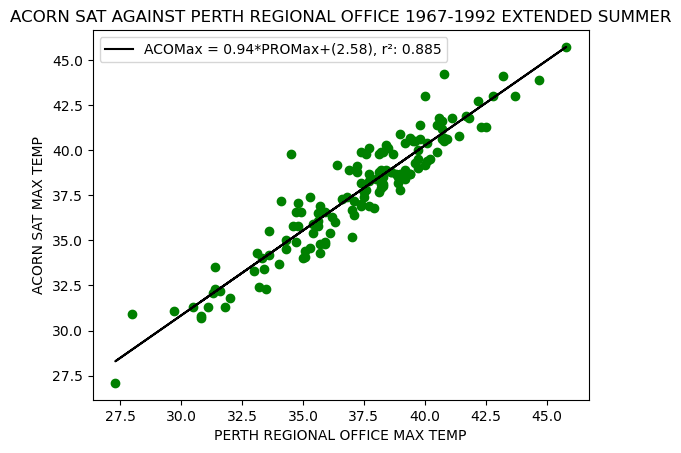

In [24]:
#MAX HW
ACORN_SAT_Mx =HW_AC_PRO['ACORN Max']
REG_OFFICE_Mx =HW_AC_PRO['PRO Max']

#find line of best fit
a1, b1 = np.polyfit(REG_OFFICE_Mx, ACORN_SAT_Mx, 1)
#add points to plot
plt.scatter(REG_OFFICE_Mx, ACORN_SAT_Mx,color = 'green')
corr, _ = pearsonr(REG_OFFICE_Mx, ACORN_SAT_Mx)
#add line of best fit to plot
plt.plot(REG_OFFICE_Mx, a1*REG_OFFICE_Mx+b1,color ='black',label = 'ACOMax = {}*PROMax+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a1, 2),round(b1, 2),round(np.power(corr,2), 3)))   
plt.legend()
plt.title('ACORN SAT AGAINST PERTH REGIONAL OFFICE 1967-1992 EXTENDED SUMMER')
plt.xlabel('PERTH REGIONAL OFFICE MAX TEMP')
plt.ylabel('ACORN SAT MAX TEMP')

Text(0, 0.5, 'ACORN SAT MIN TEMP')

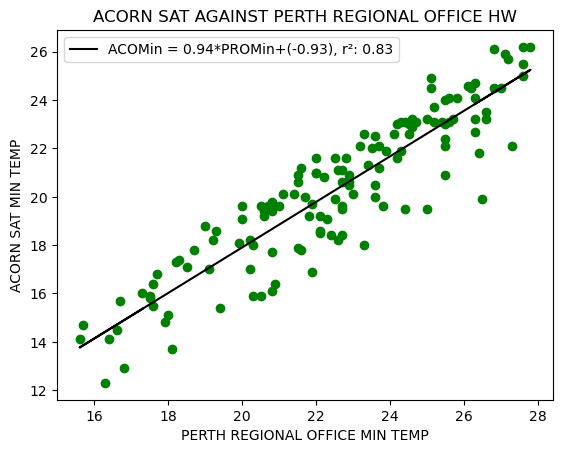

In [25]:
#MIN HW
ACORN_SAT_Mn =HW_AC_PRO['ACORN Min']
REG_OFFICE_Mn =HW_AC_PRO['PRO Min']

#find line of best fit
a2, b2 = np.polyfit(REG_OFFICE_Mn, ACORN_SAT_Mn, 1)
#add points to plot
plt.scatter(REG_OFFICE_Mn, ACORN_SAT_Mn,color = 'green')
corr, _ = pearsonr(REG_OFFICE_Mn, ACORN_SAT_Mn)
#add line of best fit to plot
plt.plot(REG_OFFICE_Mn, a2*REG_OFFICE_Mn+b2,color ='black',label = 'ACOMin = {}*PROMin+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a2, 2),round(b2, 2),round(np.power(corr,2), 3)))   
plt.legend()
plt.title('ACORN SAT AGAINST PERTH REGIONAL OFFICE HW')
plt.xlabel('PERTH REGIONAL OFFICE MIN TEMP')
plt.ylabel('ACORN SAT MIN TEMP')

This is a promising sign, what we can see here is that there is a 1:1 ratio in the heatwave days as well with less correlation but still high and positive.

Max is bascially the same equation as the max temperature in the Extended Summer relationship, however the minimum is actually 2C warmer in the heatwave components, this is an interesting, we should go into further detail about this because I want to know why it is considerably warmer at the Perth Airport then the PRO 

Text(0, 0.5, 'ACORN SAT MIN TEMP')

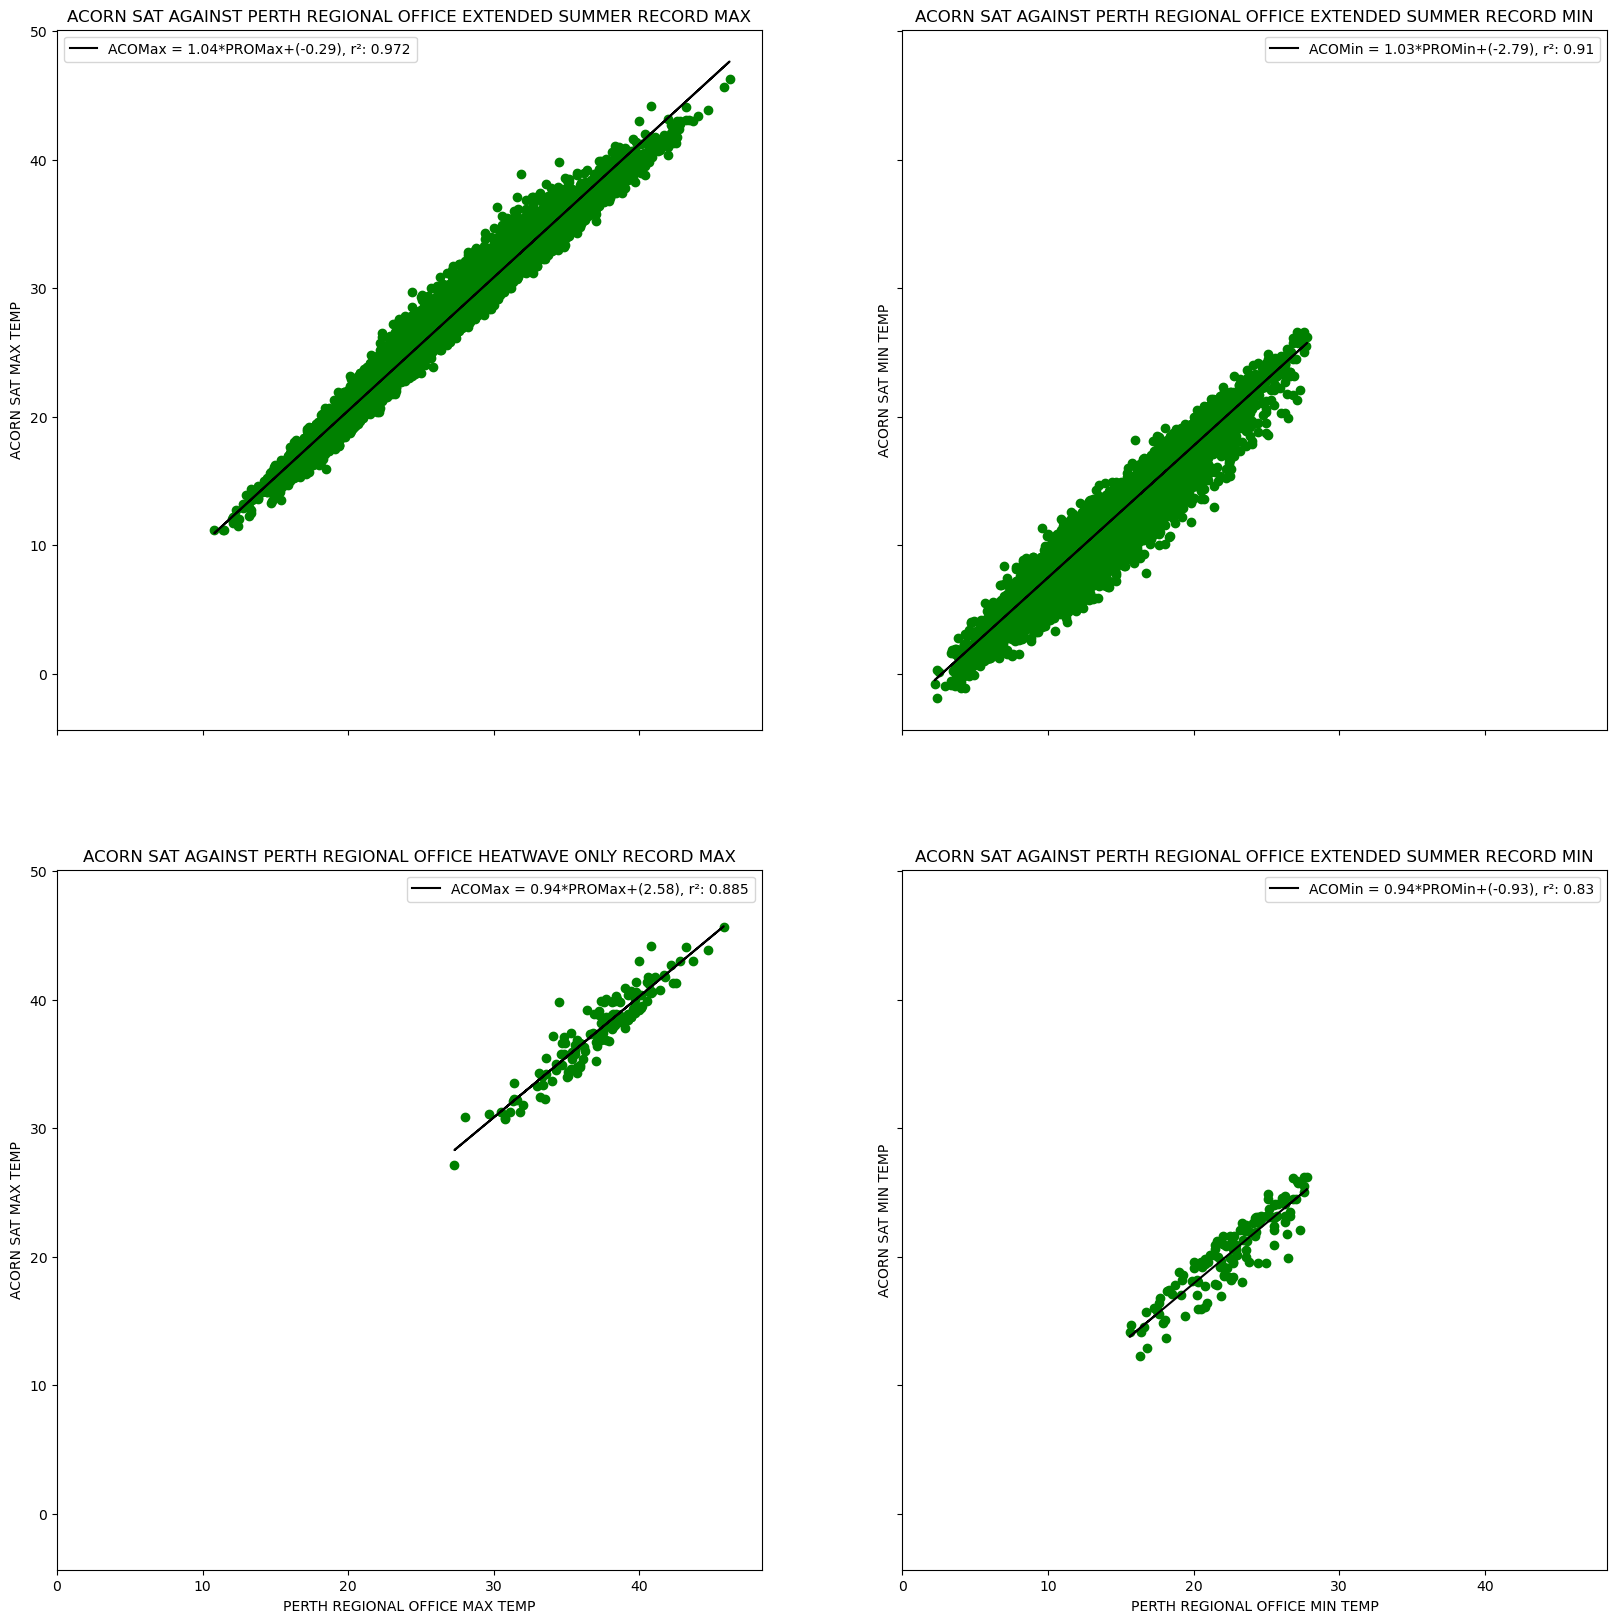

In [26]:
fig,ax = plt.subplots(nrows = 2, ncols = 2, sharex = True, sharey = True,figsize = (20,20))

ACORN_SAT_Mx =AC_PRO_DE['ACORN Max']
REG_OFFICE_Mx =AC_PRO_DE['PRO Max']

#find line of best fit
a3, b3 = np.polyfit(REG_OFFICE_Mx, ACORN_SAT_Mx, 1)
#add points to plot
ax[0,0].scatter(REG_OFFICE_Mx, ACORN_SAT_Mx,color = 'green')
corr, _ = pearsonr(REG_OFFICE_Mx, ACORN_SAT_Mx)
#add line of best fit to plot
ax[0,0].plot(REG_OFFICE_Mx, a3*REG_OFFICE_Mx+b3,color ='black',label = 'ACOMax = {}*PROMax+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a3, 2),round(b3, 2),round(np.power(corr,2), 3)))   
ax[0,0].legend()
ax[0,0].set_title('ACORN SAT AGAINST PERTH REGIONAL OFFICE EXTENDED SUMMER RECORD MAX')
ax[0,0].set_ylabel('ACORN SAT MAX TEMP')


ACORN_SAT_Mn =AC_PRO_DE['ACORN Min']
REG_OFFICE_Mn =AC_PRO_DE['PRO Min']

#find line of best fit
a4, b4 = np.polyfit(REG_OFFICE_Mn, ACORN_SAT_Mn, 1)
#add points to plot
ax[0,1].scatter(REG_OFFICE_Mn, ACORN_SAT_Mn,color = 'green')
corr, _ = pearsonr(REG_OFFICE_Mn, ACORN_SAT_Mn)
#add line of best fit to plot
ax[0,1].plot(REG_OFFICE_Mn, a4*REG_OFFICE_Mn+b4,color ='black',label = 'ACOMin = {}*PROMin+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a4, 2),round(b4, 2),round(np.power(corr,2), 3)))   
ax[0,1].legend()
ax[0,1].set_title('ACORN SAT AGAINST PERTH REGIONAL OFFICE EXTENDED SUMMER RECORD MIN')
ax[0,1].set_ylabel('ACORN SAT MIN TEMP')







#The third is heatwave events only


ACORN_SAT_Mx =HW_AC_PRO['ACORN Max']
REG_OFFICE_Mx =HW_AC_PRO['PRO Max']

#find line of best fit
a5, b5 = np.polyfit(REG_OFFICE_Mx, ACORN_SAT_Mx, 1)
#add points to plot
ax[1,0].scatter(REG_OFFICE_Mx, ACORN_SAT_Mx,color = 'green')
corr, _ = pearsonr(REG_OFFICE_Mx, ACORN_SAT_Mx)
#add line of best fit to plot
ax[1,0].plot(REG_OFFICE_Mx, a5*REG_OFFICE_Mx+b5,color ='black',label = 'ACOMax = {}*PROMax+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a5, 2),round(b5, 2),round(np.power(corr,2), 3)))   
ax[1,0].legend()
ax[1,0].set_title('ACORN SAT AGAINST PERTH REGIONAL OFFICE HEATWAVE ONLY RECORD MAX')
ax[1,0].set_xlabel('PERTH REGIONAL OFFICE MAX TEMP')
ax[1,0].set_ylabel('ACORN SAT MAX TEMP')



ACORN_SAT_Mn =HW_AC_PRO['ACORN Min']
REG_OFFICE_Mn =HW_AC_PRO['PRO Min']

#find line of best fit
a6, b6 = np.polyfit(REG_OFFICE_Mn, ACORN_SAT_Mn, 1)
#add points to plot
ax[1,1].scatter(REG_OFFICE_Mn, ACORN_SAT_Mn,color = 'green')
corr, _ = pearsonr(REG_OFFICE_Mn, ACORN_SAT_Mn)
#add line of best fit to plot
ax[1,1].plot(REG_OFFICE_Mn, a6*REG_OFFICE_Mn+b6,color ='black',label = 'ACOMin = {}*PROMin+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a6, 2),round(b6, 2),round(np.power(corr,2), 3)))   
ax[1,1].legend()
ax[1,1].set_title('ACORN SAT AGAINST PERTH REGIONAL OFFICE EXTENDED SUMMER RECORD MIN')
ax[1,1].set_xlabel('PERTH REGIONAL OFFICE MIN TEMP')
ax[1,1].set_ylabel('ACORN SAT MIN TEMP')


These are the comparisons, there should be an effort to put all this together as well in one two show the different values

### 1967-1992 Sub-Daily and Daily Extremes - PT12_1967_1992_SUBDAILVMAXMIN

In [29]:
#Load the Sub_Daily Data In
PRO_Sub = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\perthregionaloffice_subdaily_1942-1992.csv")

PRO_Sub['date'] = pd.to_datetime(PRO_Sub['date'],dayfirst = True)

#What we notice is that the temp has the decimal in the wrong place

PRO_Sub = PRO_Sub.set_index('date')
PRO_Sub =PRO_Sub['temp']/10 
PRO_Sub

#Now lets get it into the extended Summer Record with the extra months of the 10th and 4th in because we want the prior stuff
#for early Nov and Late March

# Lets get this into extended summer and break it up into individual hours
PRO_Sub_ES  = PRO_Sub.loc['1967':'1992']
PRO_Sub_ES = pd.concat([  PRO_Sub_ES[PRO_Sub_ES.index.month==11], PRO_Sub_ES[PRO_Sub_ES.index.month==12], PRO_Sub_ES[PRO_Sub_ES.index.month==1], PRO_Sub_ES[PRO_Sub_ES.index.month==2], PRO_Sub_ES[PRO_Sub_ES.index.month==3],], axis = 0)
PRO_Sub_0 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==0]],axis =0)
PRO_Sub_3= pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==3]],axis =0)
PRO_Sub_6= pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==6]],axis =0)
PRO_Sub_9= pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==9]],axis =0)
PRO_Sub_12= pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==12]],axis =0)
PRO_Sub_15= pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==15]],axis =0)
PRO_Sub_18= pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==18]],axis =0)
PRO_Sub_21= pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==21]],axis =0)




#Reomve hours out of it for concatiation

PRO_Sub_0 = PRO_Sub_0.reset_index()
PRO_Sub_0['date'] = pd.to_datetime(PRO_Sub_0['date']).dt.date
PRO_Sub_0 = PRO_Sub_0.set_index('date')

PRO_Sub_3 = PRO_Sub_3.reset_index()
PRO_Sub_3['date'] = pd.to_datetime(PRO_Sub_3['date']).dt.date
PRO_Sub_3 = PRO_Sub_3.set_index('date')


PRO_Sub_6 = PRO_Sub_6.reset_index()
PRO_Sub_6['date'] = pd.to_datetime(PRO_Sub_6['date']).dt.date
PRO_Sub_6 = PRO_Sub_6.set_index('date')

PRO_Sub_9 = PRO_Sub_9.reset_index()
PRO_Sub_9['date'] = pd.to_datetime(PRO_Sub_9['date']).dt.date
PRO_Sub_9 = PRO_Sub_9.set_index('date')

PRO_Sub_12 = PRO_Sub_12.reset_index()
PRO_Sub_12['date'] = pd.to_datetime(PRO_Sub_12['date']).dt.date
PRO_Sub_12 = PRO_Sub_12.set_index('date')

PRO_Sub_15 = PRO_Sub_15.reset_index()
PRO_Sub_15['date'] = pd.to_datetime(PRO_Sub_15['date']).dt.date
PRO_Sub_15 = PRO_Sub_15.set_index('date')

PRO_Sub_18 = PRO_Sub_18.reset_index()
PRO_Sub_18['date'] = pd.to_datetime(PRO_Sub_18['date']).dt.date
PRO_Sub_18 = PRO_Sub_18.set_index('date')

PRO_Sub_21 = PRO_Sub_21.reset_index()
PRO_Sub_21['date'] = pd.to_datetime(PRO_Sub_21['date']).dt.date
PRO_Sub_21 = PRO_Sub_21.set_index('date')



PRO_Sub_0 = PRO_Sub_0.rename(columns={'temp':'12am Temperature'})
PRO_Sub_3 = PRO_Sub_3.rename(columns={'temp':'3am Temperature'})
PRO_Sub_6 = PRO_Sub_6.rename(columns={'temp':'6am Temperature'})
PRO_Sub_9 = PRO_Sub_9.rename(columns={'temp':'9am Temperature'})
PRO_Sub_12 = PRO_Sub_12.rename(columns={'temp':'12pm Temperature'})
PRO_Sub_15 = PRO_Sub_15.rename(columns={'temp':'3pm Temperature'})
PRO_Sub_18= PRO_Sub_18.rename(columns={'temp':'6pm Temperature'})
PRO_Sub_21 = PRO_Sub_21.rename(columns={'temp':'9pm Temperature'})

In [30]:
PRO_Sub_21

9pm Temperature
date                       
1967-11-01             18.8
1967-11-02             17.5
1967-11-03             15.8
1967-11-04             16.5
1967-11-05             20.6
...                     ...
1992-03-27             21.0
1992-03-28             21.0
1992-03-29             21.0
1992-03-30             21.8
1992-03-31             26.7

[3522 rows x 1 columns]

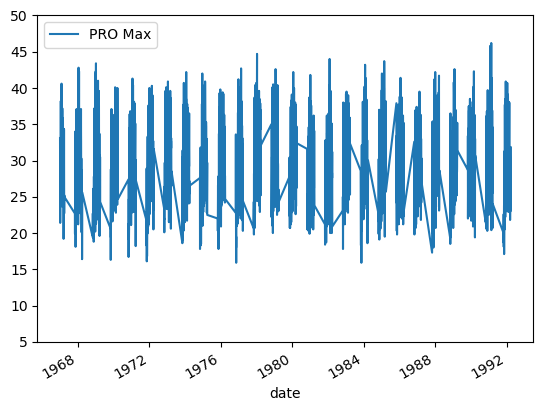

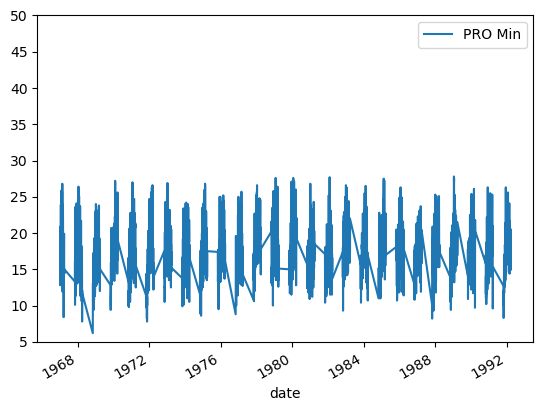

<Figure size 640x480 with 0 Axes>

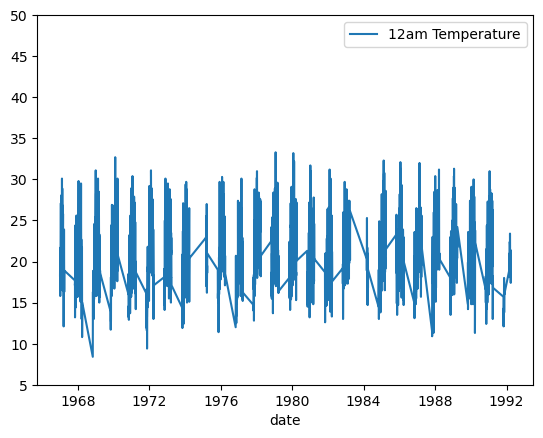

<Figure size 640x480 with 0 Axes>

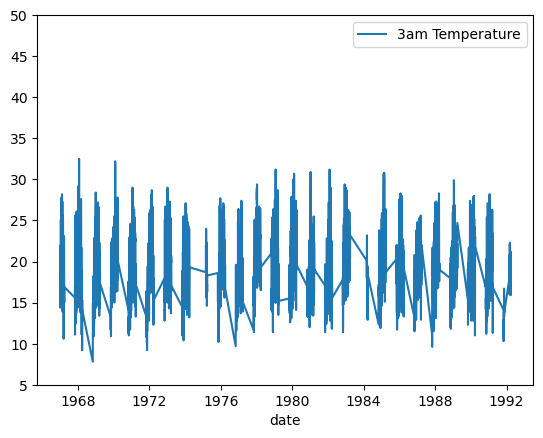

<Figure size 640x480 with 0 Axes>

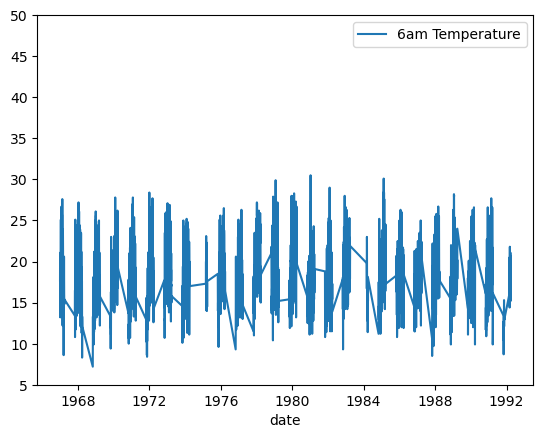

<Figure size 640x480 with 0 Axes>

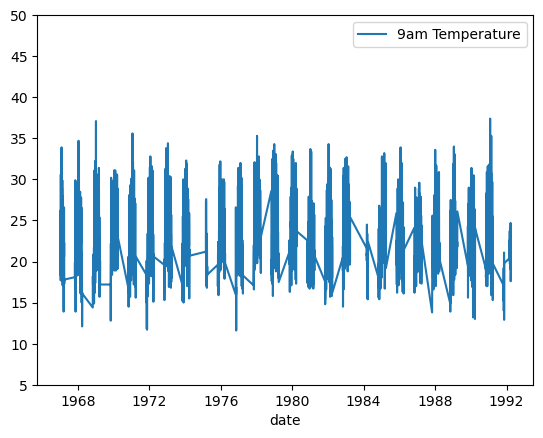

<Figure size 640x480 with 0 Axes>

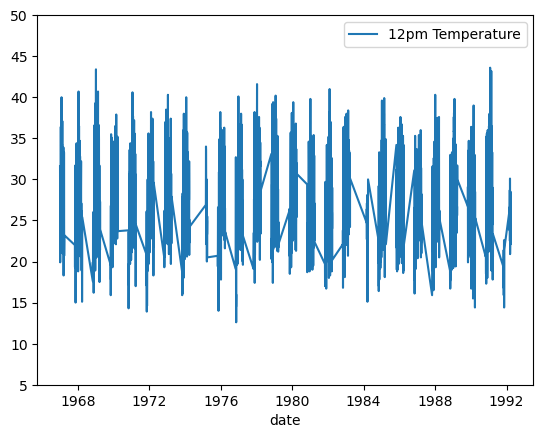

<Figure size 640x480 with 0 Axes>

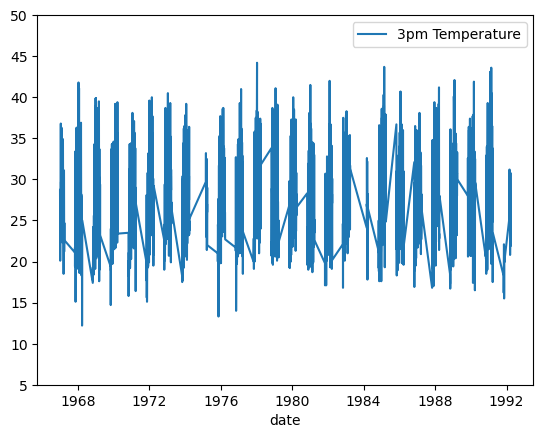

<Figure size 640x480 with 0 Axes>

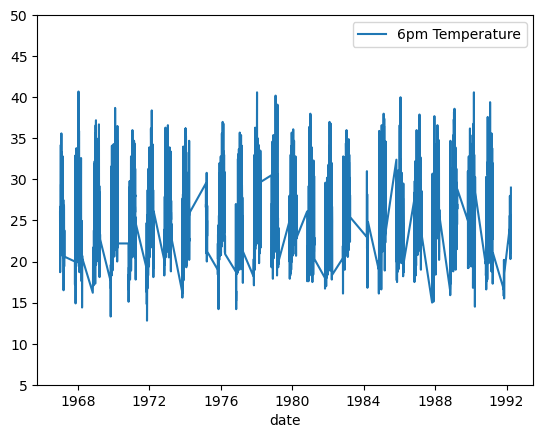

<Figure size 640x480 with 0 Axes>

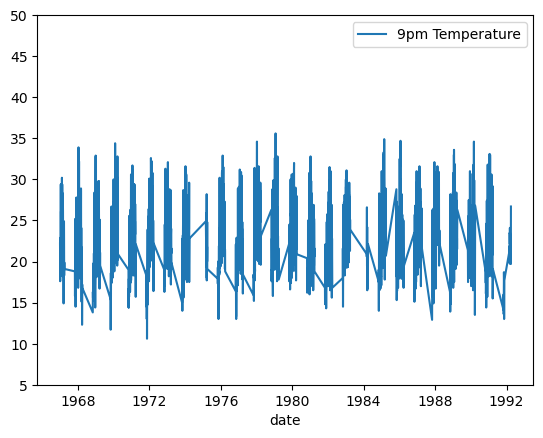

In [31]:

Plotters = [AC_PRO_ES['PRO Max'],AC_PRO_ES['PRO Min'],PRO_Sub_0,PRO_Sub_3,PRO_Sub_6,PRO_Sub_9,PRO_Sub_12,PRO_Sub_15,PRO_Sub_18,PRO_Sub_21]
for Plot in Plotters:
    plt.figure()
    Plot.plot()
    plt.ylim([5,50])
    plt.legend()

In [32]:
#Merge the sub-daily with max and min
PRO_Sub_0 = pd.merge(left = AC_PRO_ES,right  =PRO_Sub_0 ,left_index=True,right_index=True  ).dropna()
PRO_Sub_3 = pd.merge(left = AC_PRO_ES,right  =PRO_Sub_3 ,left_index=True,right_index=True  ).dropna()
PRO_Sub_6 = pd.merge(left = AC_PRO_ES,right  =PRO_Sub_6 ,left_index=True,right_index=True  ).dropna()
PRO_Sub_9 = pd.merge(left = AC_PRO_ES,right  =PRO_Sub_9 ,left_index=True,right_index=True  ).dropna()
PRO_Sub_12 = pd.merge(left = AC_PRO_ES,right  =PRO_Sub_12 ,left_index=True,right_index=True  ).dropna()
PRO_Sub_15= pd.merge(left = AC_PRO_ES,right  =PRO_Sub_15 ,left_index=True,right_index=True  ).dropna()
PRO_Sub_18 = pd.merge(left = AC_PRO_ES,right  =PRO_Sub_18 ,left_index=True,right_index=True  ).dropna()
PRO_Sub_21 = pd.merge(left = AC_PRO_ES,right  =PRO_Sub_21 ,left_index=True,right_index=True  ).dropna()  

#Put the Sub_Dailys into one catergory
PRO_Sub_Columns = [PRO_Sub_0,PRO_Sub_3,PRO_Sub_6,PRO_Sub_9,PRO_Sub_12,PRO_Sub_15,PRO_Sub_18,PRO_Sub_21]
Titles_X =  ['12am Temperature','3am Temperature','6am Temperature','9am Temperature','12pm Temperature','3pm Temperature','6pm Temperature','9pm Temperature']


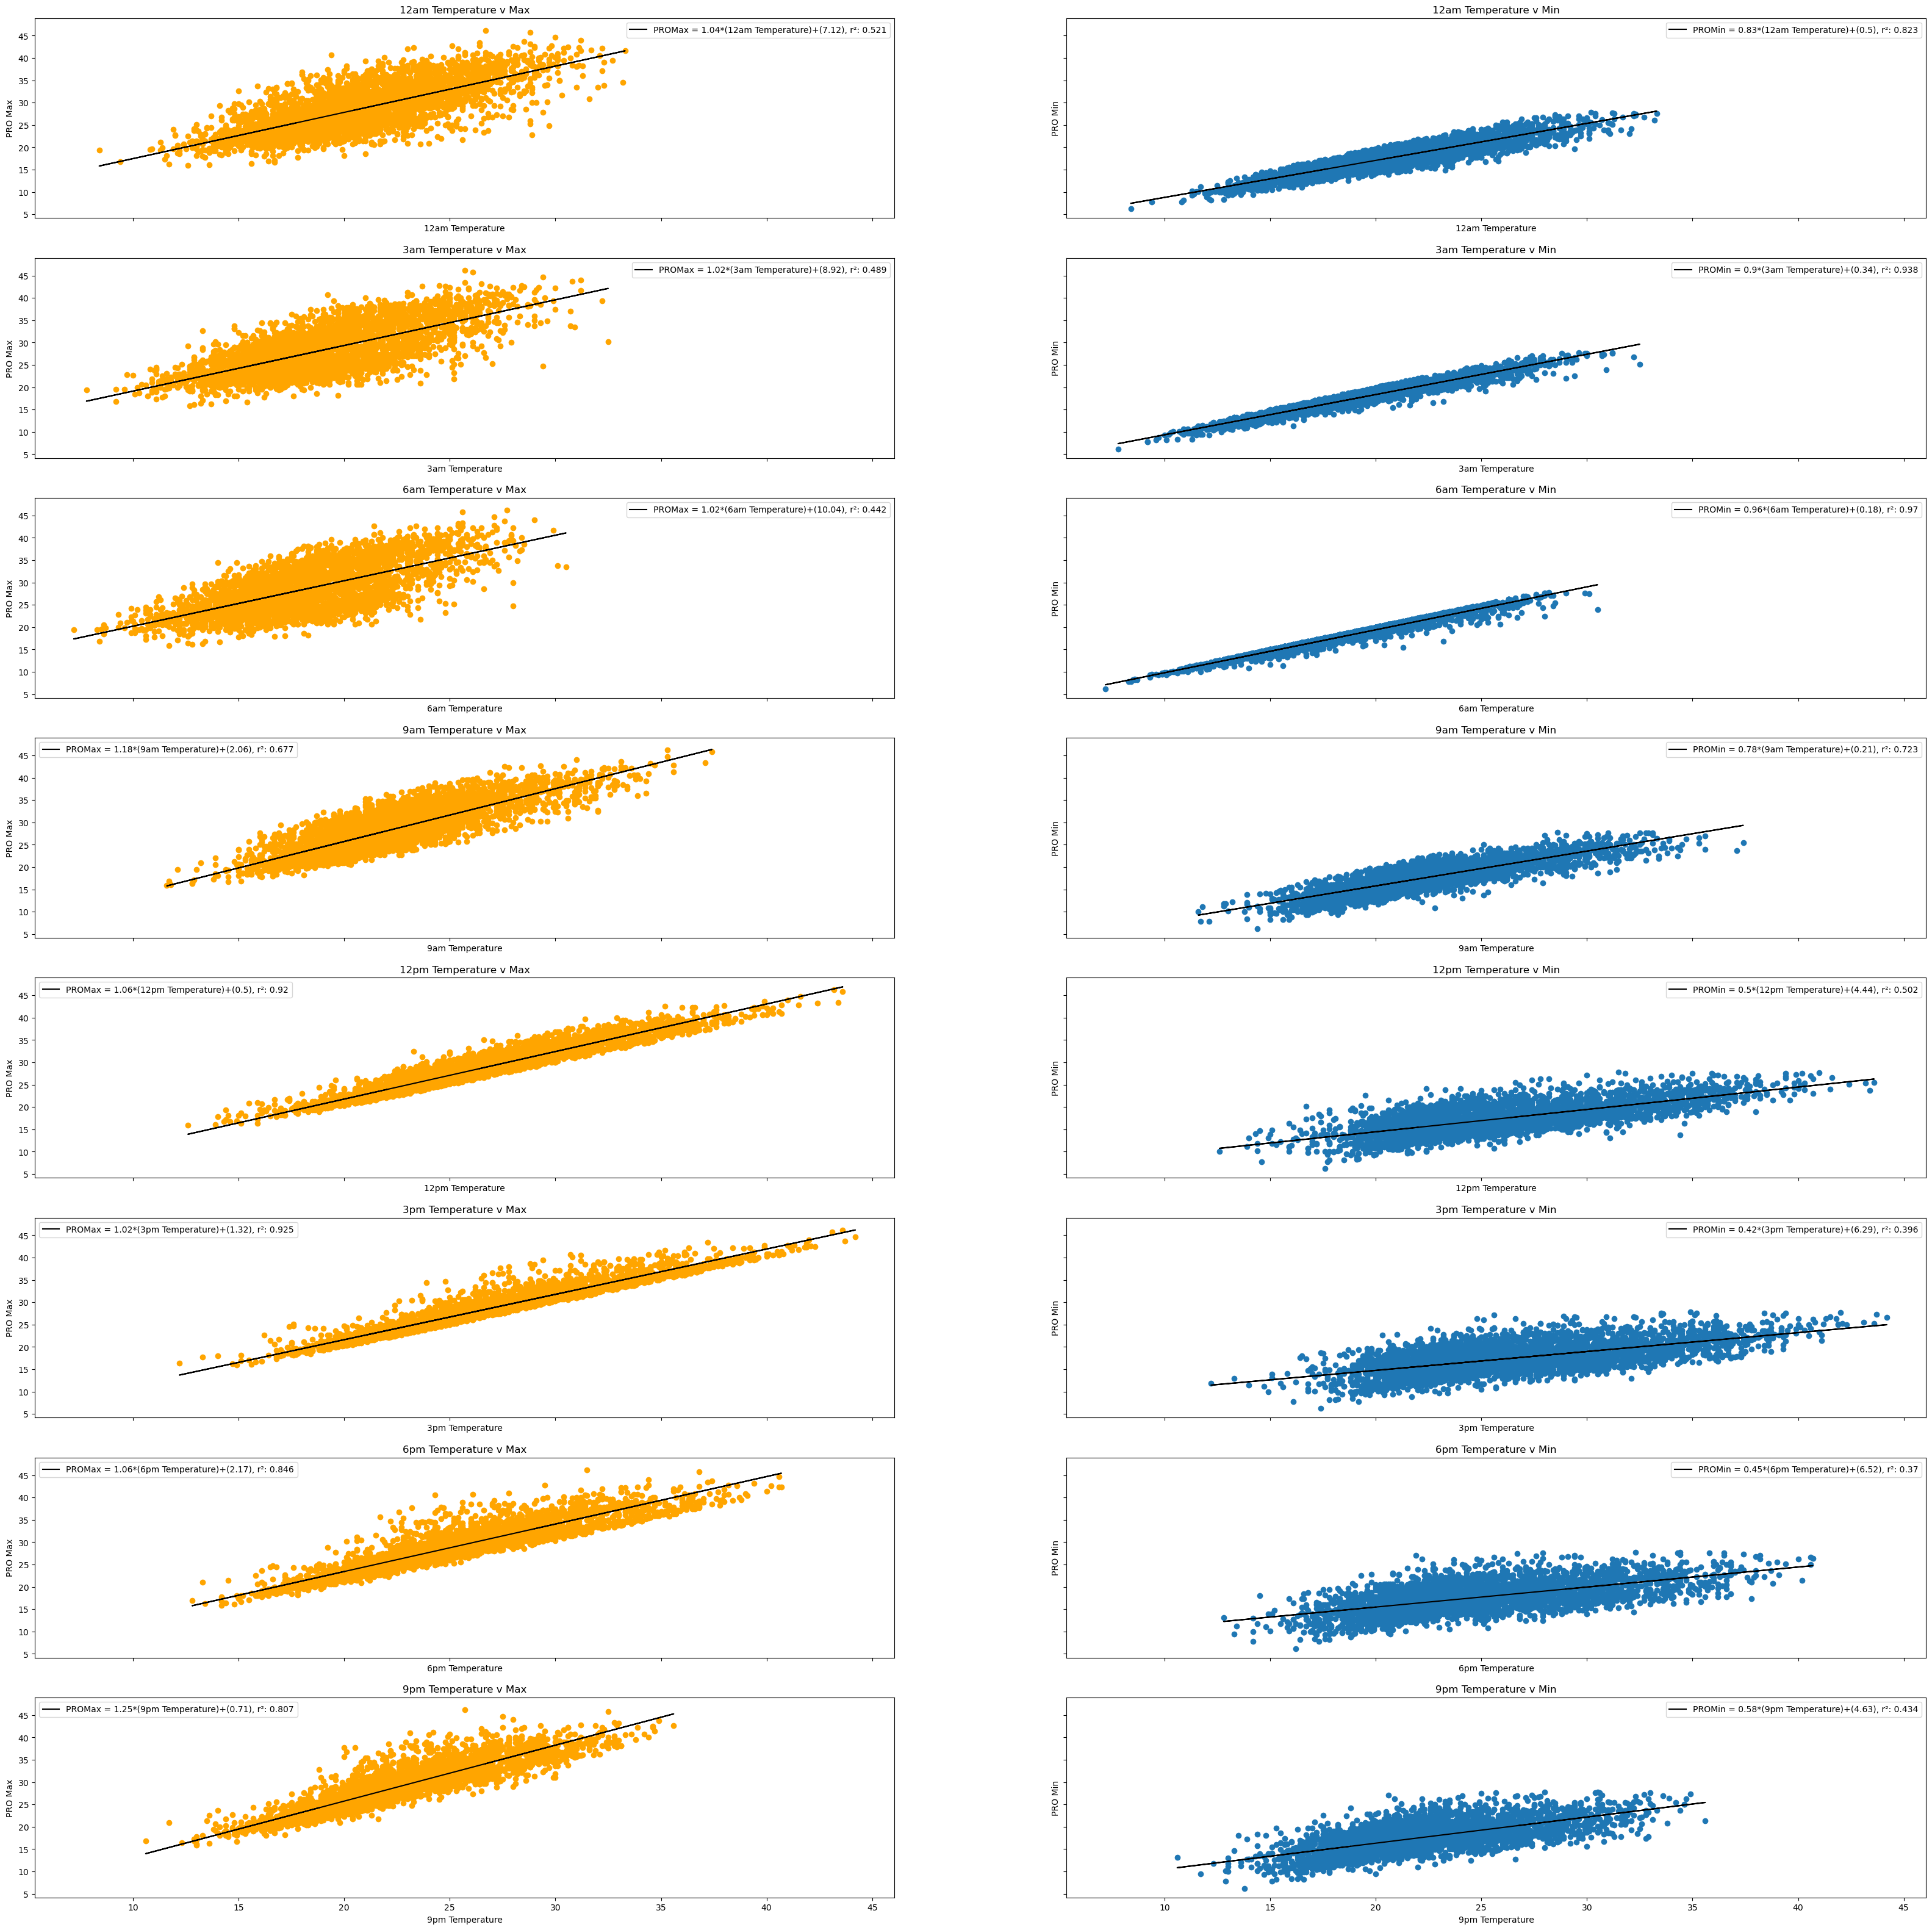

In [33]:



fig,ax = plt.subplots(nrows = 8, ncols = 2, sharex = True, sharey = True,figsize = (40,40))

for i in np.array([0,1,2,3,4,5,6,7]):
    #Plot the scatter
    #Max v Sub
    #find line of best fit
    a, b = np.polyfit(PRO_Sub_Columns[i][Titles_X[i]],PRO_Sub_Columns[i]['PRO Max'], 1)
    #add points to plot
    corr, _ = pearsonr(PRO_Sub_Columns[i][Titles_X[i]],PRO_Sub_Columns[i]['PRO Max'])
    ax[i,0].scatter(PRO_Sub_Columns[i][Titles_X[i]],PRO_Sub_Columns[i]['PRO Max'],color = 'orange')
    ax[i,0].set_ylabel('PRO Max')
    ax[i,0].set_title('{} v Max'.format(Titles_X[i]))
    ax[i,0].set_xlabel('{}'.format(Titles_X[i]))
    ax[i,0].plot(PRO_Sub_Columns[i][Titles_X[i]], a*PRO_Sub_Columns[i][Titles_X[i]]+b,color ='black',label = 'PROMax = {}*({})+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a, 2),Titles_X[i],round(b, 2),round(np.power(corr,2), 3)))   
    ax[i,0].legend()
    
    
    #Max v Sub
    a1, b1 = np.polyfit(PRO_Sub_Columns[i][Titles_X[i]],PRO_Sub_Columns[i]['PRO Min'], 1)
    #add points to plot
    corr, _ = pearsonr(PRO_Sub_Columns[i][Titles_X[i]],PRO_Sub_Columns[i]['PRO Min'])
    ax[i,1].scatter(PRO_Sub_Columns[i][Titles_X[i]],PRO_Sub_Columns[i]['PRO Min'])
    ax[i,1].set_ylabel('PRO Min')
    ax[i,1].set_title('{} v Min'.format(Titles_X[i]))
    ax[i,1].set_xlabel('{}'.format(Titles_X[i]))
    ax[i,1].plot(PRO_Sub_Columns[i][Titles_X[i]], a1*PRO_Sub_Columns[i][Titles_X[i]]+b1,color ='black',label = 'PROMin = {}*({})+({}), r\N{SUPERSCRIPT TWO}: {}'.format(round(a1, 2),Titles_X[i],round(b1, 2),round(np.power(corr,2), 3)))   
    ax[i,1].legend()

#### Note
When applying the function add October and April as well as they will be vital is finding Nov and Mar heatwaves

### Getting 1880-1900 Temperature Data to work with ACORN SAT and PRO


In [ ]:
PRO_DE['PRO Max'].plot()
P_Gardens['timax'].plot()



In [ ]:
P_Gardens['tmax'].plot()

In [ ]:
P_Gardens

In [ ]:
Daily_Extremes

In [ ]:
#Set all dates to datetime
#ACORN-SAT 
Daily_Extremes['date'] = pd.to_datetime(Daily_Extremes['date'],format="%Y/%m/%d")
Daily_Extremes = Daily_Extremes.set_index('date')

#Perth Regional Office
PRO_DE['date'] = pd.to_datetime(PRO_DE['date'],format="%Y/%m/%d")
PRO_DE = PRO_DE.set_index('date')

#Perth Gardens Unadjusted
P_Gardens['date'] = pd.to_datetime(P_Gardens['date'],format="%Y/%m/%d")
P_Gardens = P_Gardens.set_index('date')

#Perth Gardens Adjusted
P_Gardens_Corr['date'] = pd.to_datetime(P_Gardens_Corr['date'],format="%Y/%m/%d")
P_Gardens_Corr = P_Gardens_Corr.set_index('date')

In [ ]:
#Plot ACORN-SAT yearly
Daily_Extremes['Max'].resample('YS').mean().plot()

#Plot Perth Regional Office Yearly
PRO_DE['PRO Max'].resample('YS').mean().plot()

#Plot Unadjusted Perth Gardens
P_Gardens['tmax'].resample('YS').mean().plot() 
#Plot Adjusted Perth Gardens
P_Gardens_Corr['tmax'].resample('YS').mean().plot() 

plt.legend(['ACORN-SAT','Perth Regional Office','1880-1900 Unadjusted','1880-1900 Adjusted'])
plt.title('Yearly Average of Max Temp for Different Perth Datasets')
plt.ylabel('Temperature (degC)')

In [ ]:
#Plot ACORN-SAT yearly
Daily_Extremes['Min'].resample('YS').mean().plot()

#Plot Perth Regional Office Yearly
PRO_DE['PRO Min'].resample('YS').mean().plot()

#Plot Unadjusted Perth Gardens
P_Gardens['tmin'].resample('YS').mean().plot() 
#Plot Adjusted Perth Gardens
P_Gardens_Corr['tmin'].resample('YS').mean().plot() 

plt.legend(['ACORN-SAT','Perth Regional Office','1880-1900 Unadjusted','1880-1900 Adjusted'])
plt.title('Yearly Average of Min Temp for Different Perth Datasets')
plt.ylabel('Temperature (degC)')

## 6. CREATING THE RELATIONSHIP for Est Max and Min

So since we know its a 1:1 we can safely say that well the relationship even if its a degree lower should still translate up and down witht the 1:1 ratio.

Therefore we need to understand how this works without adding randomisation into it.


The key properties of the relationship is that we have
SUB-DAILY DATA 3-H
MAX T
MIN T

What we aim to do is use the SUB-DAILY to Match with the MAX T and MIN T
then it should form some kind of MATRIX FUNCTION WHERE

[MAXT,MINT]= [SUB-DAILY INPUTS]x...

This is the goal, but we need to do some checks in order for this to work.

First we look at the work of Linden Ashcroft/gergis 2014 and her method to estimate the max and min temperatures from sub-daily

But thinking about it in more detail i Might only need to max and min as a checker to see if my method is working lets see.
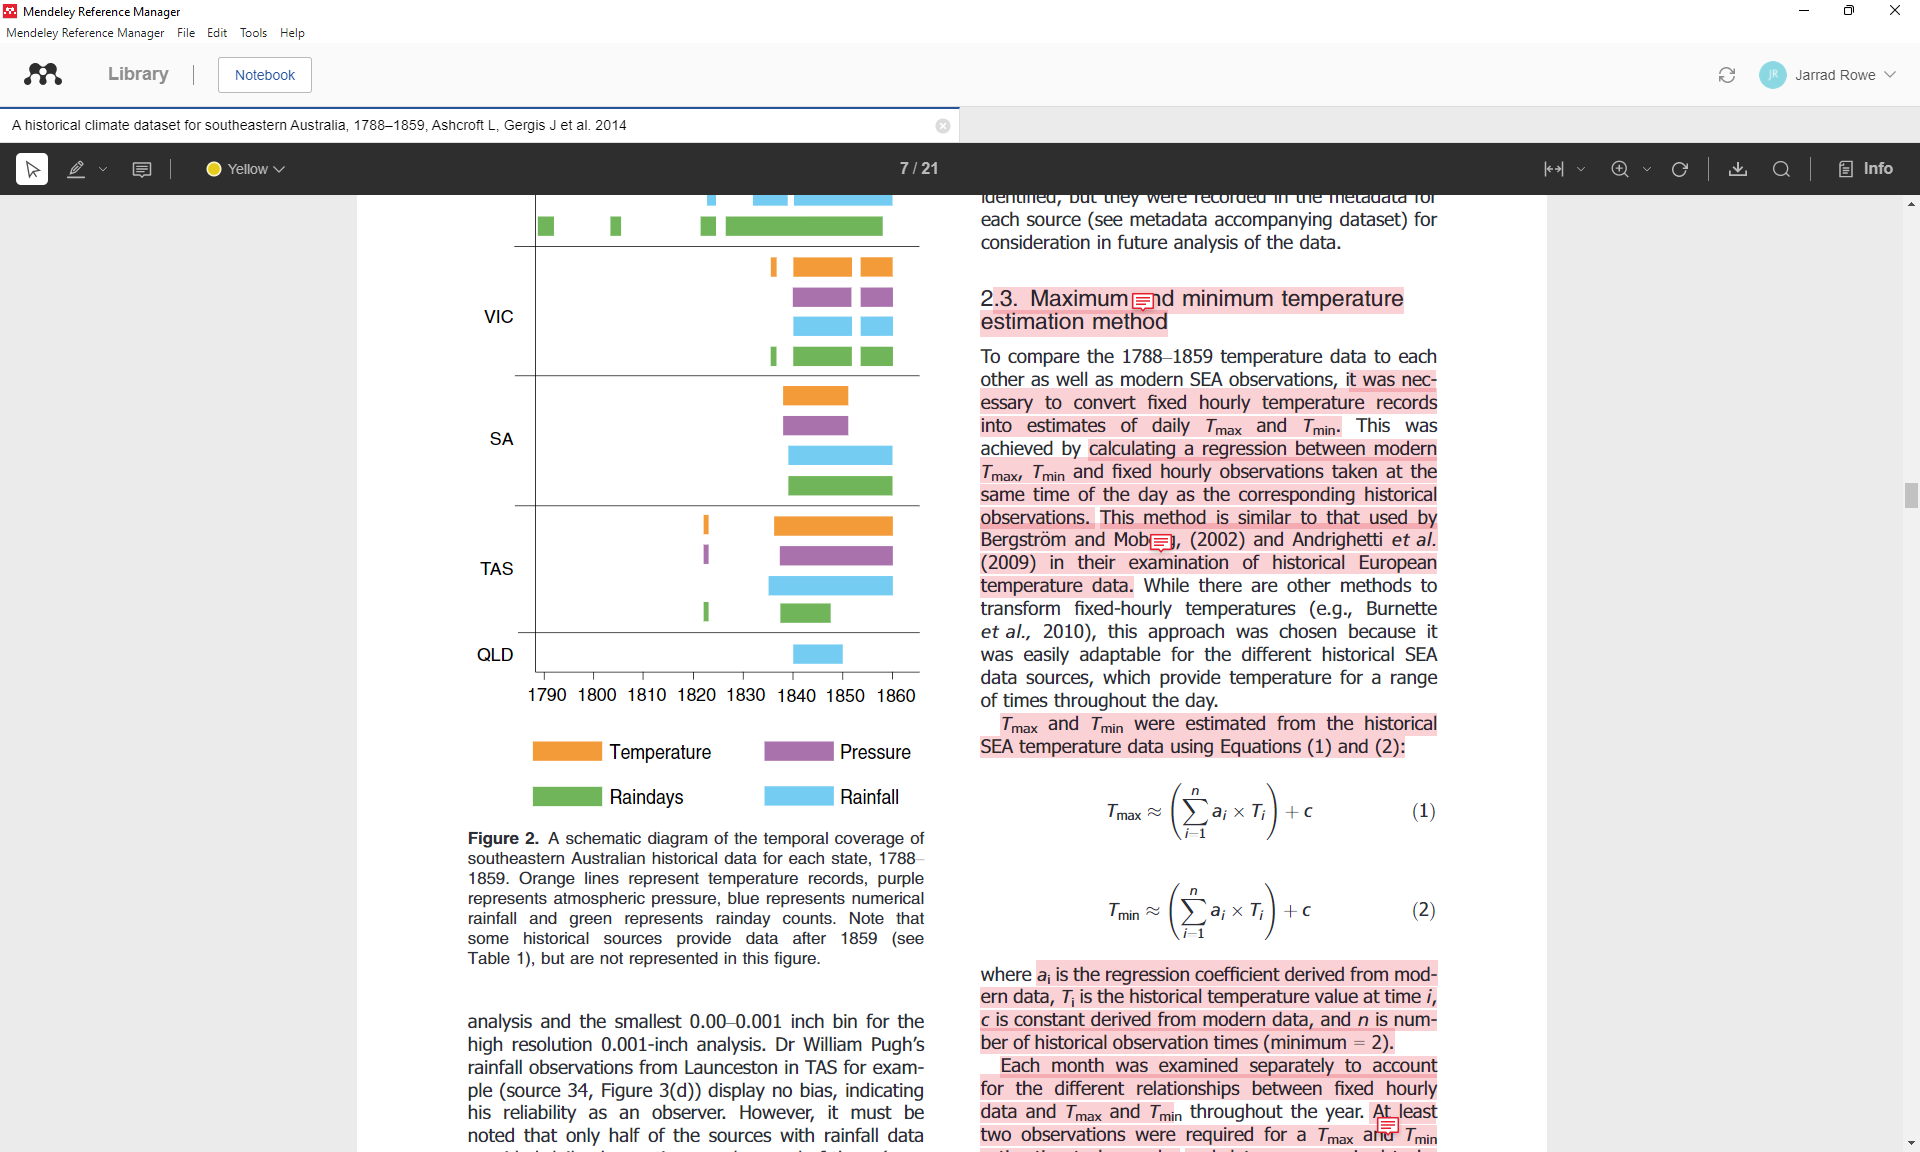

This image shows the equations

but Tmax = (sum(aixTi))+c

where ai is the regression coefficent 
Ti is the historical temperature value at time i
c is the constant derived from modern data
n is the number of historical observations a minimum of 2

hmm but it doesnt help tho

So the relationship is 
Daily Extremes and Sub-daily 

Least Square Fit 
We add a function that inputs the sub-daily and creates a smooth equation
Then Check to see whether the max and min mathc the max and min of the equation
Then if it doesnt readjust the repeat until the equation is correct

Lets start by creating a function that generates an equation that find max and min from an input of sub-daily temperatures.

Fouriers,
Quadratic
Taylors Approx

### Let Make a big thing
When theres n variables
Let there be n-1 equations
with n variables

we know the x axis is the time
the y axis is the temperature
we aim to find the max(y) and min(y)

the relationship should have the time of day and temperature at that time for two variables

y(xn,,tn) 

So it looks like we will compute a MLR which takes 24 coeefiecnts 

0 1 ... N| |C0|      |MAX0|
..      .| |C1|      |MAX1|
.  .    .| .     =   |.|
.    .  .| ..        |..|
M ...M,N | |CN|      |MAXn|


N-1 is the number of hours in the day so 24
M is the number of points implemented
So we want to optimise the Coefficents so we can match them 


We know that C values hould all be treated as normalised and in every case must be equal to 1 when summed.

In [13]:
#Coeffiencents_Values = [C0, C1, C2, C3, C4, C5, C6, C7, C8, C9, C10, C11, C12, C13, C14, C15, C16, C17, C18, C19, C20, C21, C22, C23]
Max_Temps =  PRO_DE['PRO Max']
Min_Temps =  PRO_DE['PRO Min']

So firstly we must respectively split all the sub-daily variables into their months.

In [ ]:
#October

#November

#December

#January

#February

#March



In [14]:
PRO_Sub_Columns = [PRO_Sub_0,PRO_Sub_3,PRO_Sub_6,PRO_Sub_9,PRO_Sub_12,PRO_Sub_15,PRO_Sub_18,PRO_Sub_21]

NameError: name 'PRO_Sub_0' is not defined

In [15]:
PRO_Sub_Columns

NameError: name 'PRO_Sub_Columns' is not defined

## 8. UNDERSTANDING HEATWAVE CLIMATE AND WEATHER PATTERNS